# CTA

# Loading Libraries

In [26]:
#library(clusterSim)
library(edgeR)
library(limma)
library(Glimma)
library(org.Mm.eg.db)
library(gplots)
library(RColorBrewer)
library(NMF)
library(imager)
library(repr)
options(repr.plot.width=10, repr.plot.height=10)
options(warn=-1)

# Using EdgeR and Limma -> MDS DGEs Volcano Plot and Heatmaps

In [27]:
setwd("D:/Onkar_D/UQ/Project_NanoString Single Cell/NanoString_SCC/")

In [28]:
CTA_Bioprobe_QC_SC <- read.csv("CTA_Bioprobe_QC_SC.csv", row.names=1)
CTA_Bioprobe_QC_SC <- as.data.frame(t(CTA_Bioprobe_QC_SC)) 
head(CTA_Bioprobe_QC_SC)

,A2M,ABCB1,ABCF1,ABL1,ACOT12,ACSF3,ACTA2,ACTB,ACTR3B,ACVR1B,...,YTHDF2,ZAP70,ZBTB16,ZBTB20,ZBTB32,ZC3H12A,ZEB1,ZEB2,ZIC2,ZNF205
Stroma_1_B18_cta_1_cta_1_,324.60,25.85,45.05,66.22,25.66,39.88,181.39,2946.92,36.39,40.41,...,49.36,33.48,27.02,40.15,20.45,43.69,48.27,74.97,24.83,25.53
PanCK._1_B18_cta_1_cta_1_,19.99,14.87,26.99,26.49,11.45,19.63,18.26,4185.47,15.50,24.25,...,39.07,12.67,13.41,17.80,13.40,43.80,17.64,16.29,14.02,18.00
Stroma_2_B18_cta_2_cta_2_,230.93,20.29,22.33,34.81,16.35,21.77,165.45,1637.20,17.41,20.13,...,25.85,22.90,19.68,25.88,12.48,41.01,32.49,34.55,14.34,18.38
PanCK._2_B18_cta_2_cta_2_,14.29,8.09,24.27,14.70,10.30,14.55,16.52,2383.10,13.89,19.10,...,28.05,7.04,8.42,9.09,7.66,87.01,7.36,13.37,9.93,14.57
Stroma_3_B18_cta_3_cta_3_,173.70,18.20,28.38,50.45,18.75,24.79,114.37,1793.81,23.30,24.73,...,28.38,26.61,17.20,26.10,13.63,39.99,34.06,51.46,15.16,18.72
PanCK._3_B18_cta_3_cta_3_,18.56,13.71,20.51,28.87,17.08,19.31,15.85,3473.85,19.75,23.51,...,30.76,15.47,13.71,14.67,11.37,69.28,10.09,15.77,14.39,18.24


In [29]:
groups <- substring(row.names(CTA_Bioprobe_QC_SC),1,6)
head(groups)

[1] "Stroma" "PanCK." "Stroma" "PanCK." "Stroma" "PanCK."

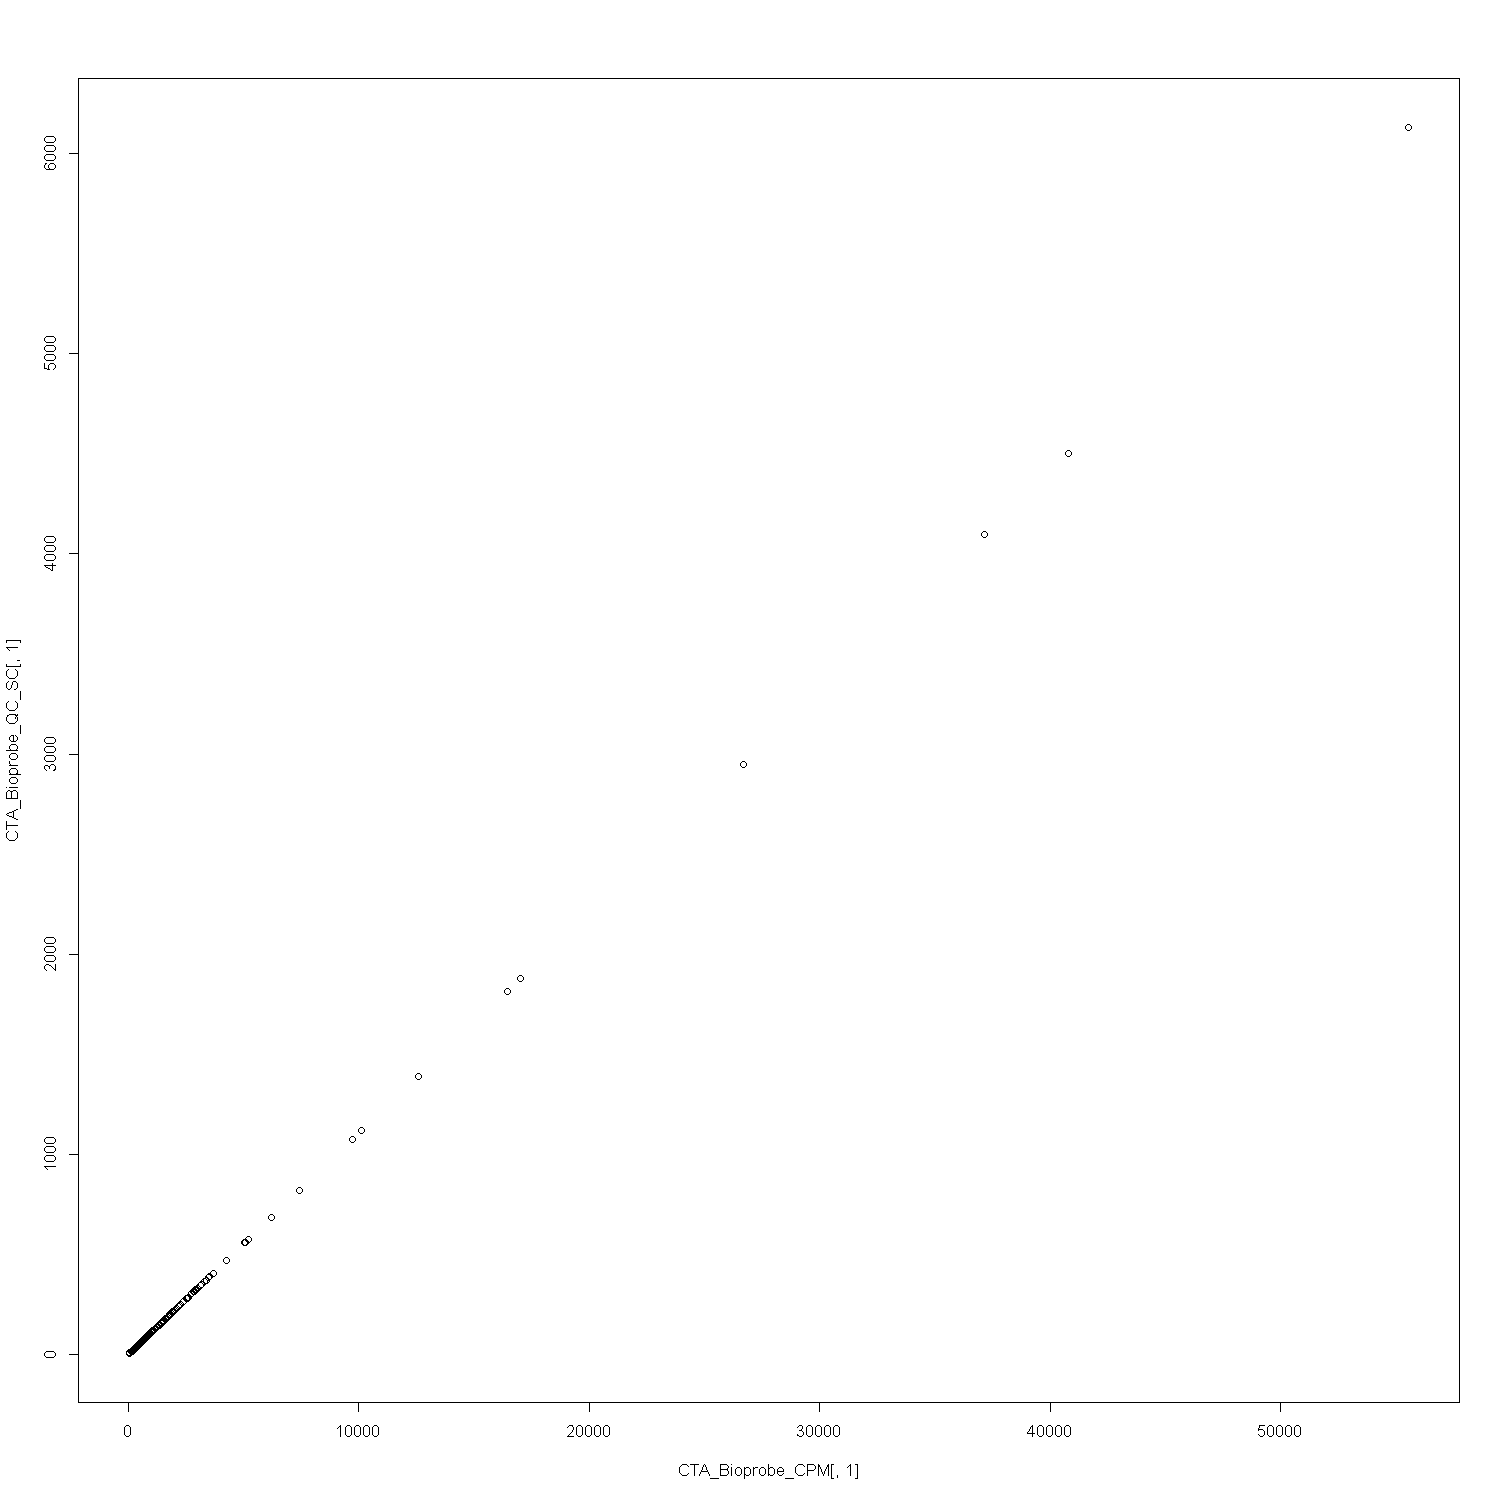

In [30]:
CTA_Bioprobe_QC_SC <- as.data.frame(t(CTA_Bioprobe_QC_SC)) 
CTA_Bioprobe_QC_DGE <- DGEList(CTA_Bioprobe_QC_SC)
CTA_Bioprobe_QC_DGE$samples$group <- groups
CTA_Bioprobe_CPM <- cpm.DGEList(CTA_Bioprobe_QC_DGE)
thresh_CTA <- CTA_Bioprobe_CPM > 0.5
keep_CTA <- rowSums(thresh_CTA) >= 2
plot(CTA_Bioprobe_CPM[,1],CTA_Bioprobe_QC_SC[,1])

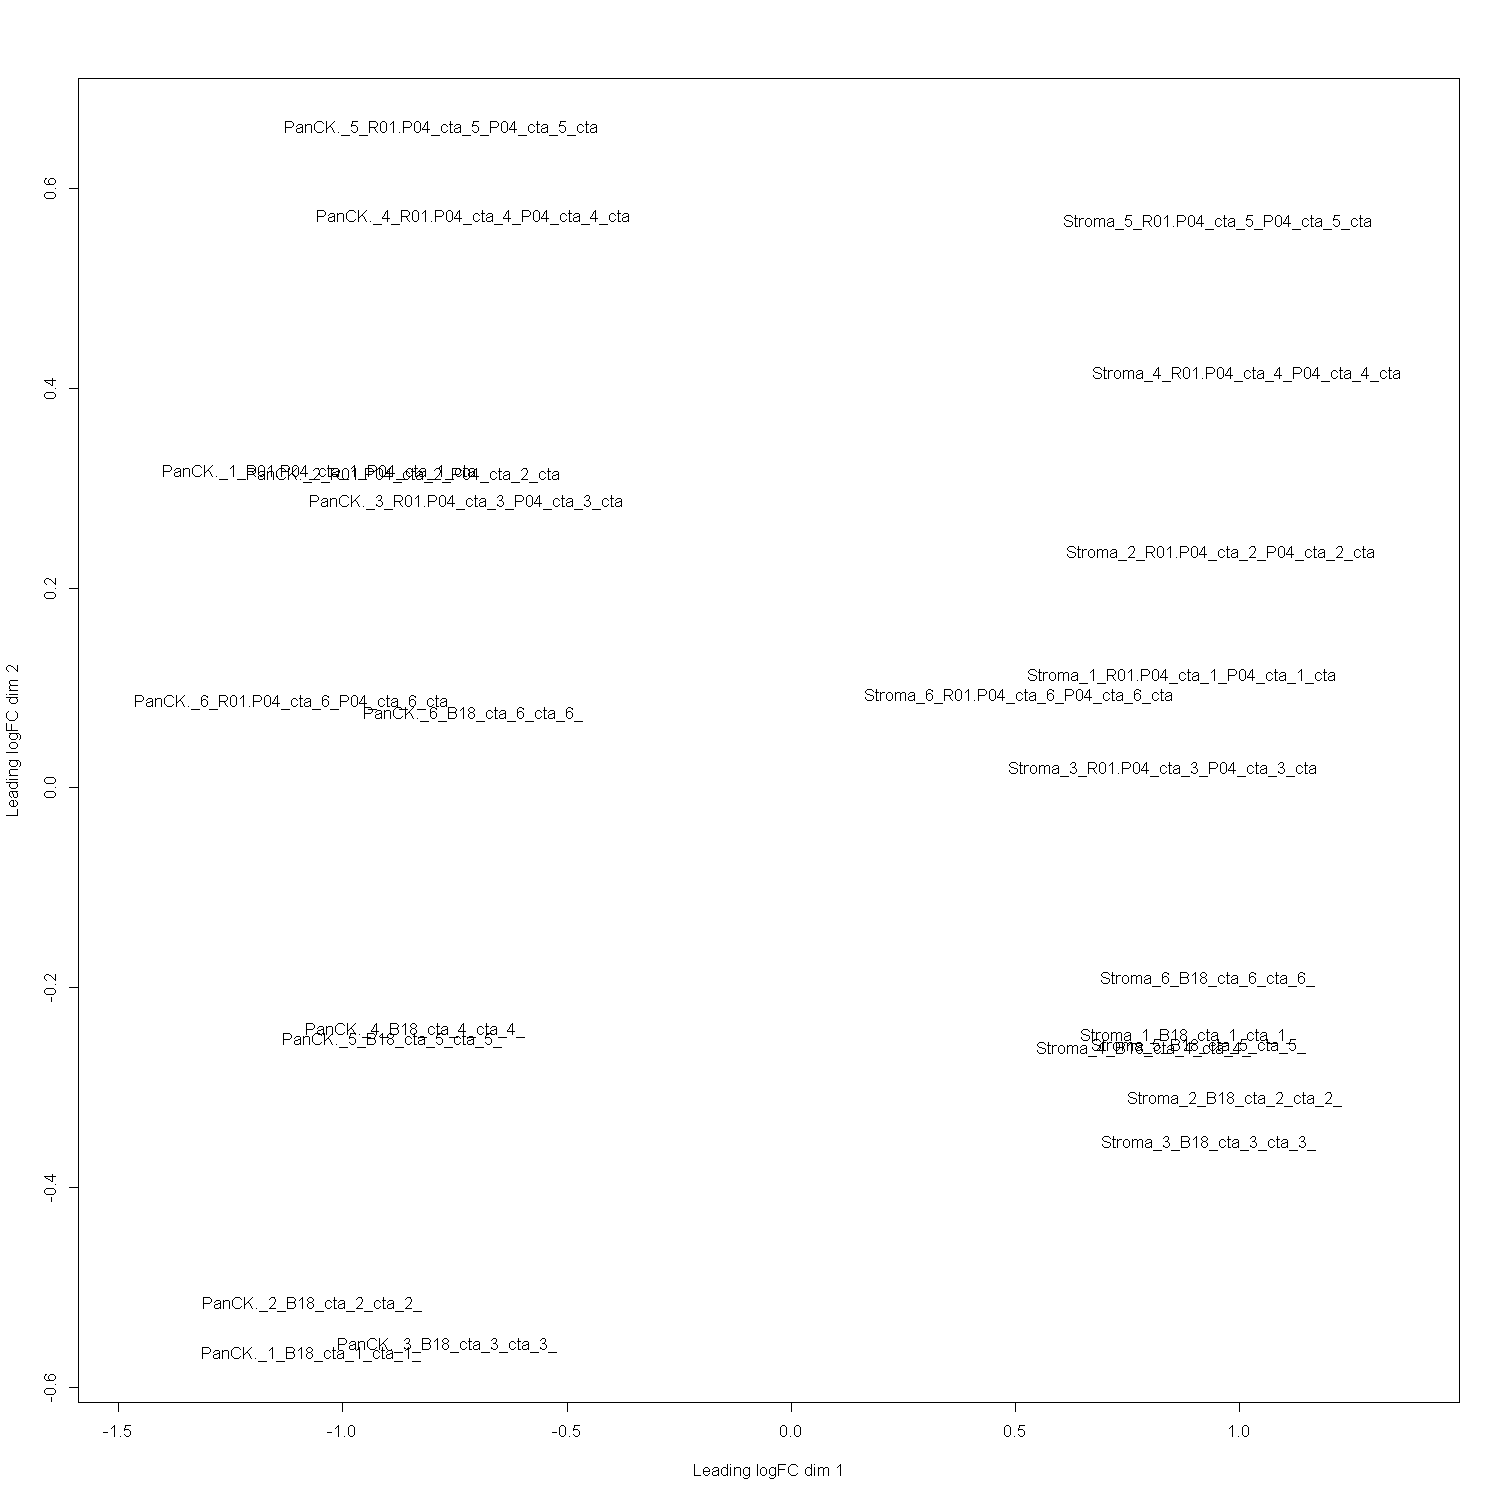

In [31]:
#col.cell <- c("purple","orange")[groups]
plotMDS(CTA_Bioprobe_QC_DGE)

### Screenshot of Interactive Plot

### Red Panck and Blue Stroma

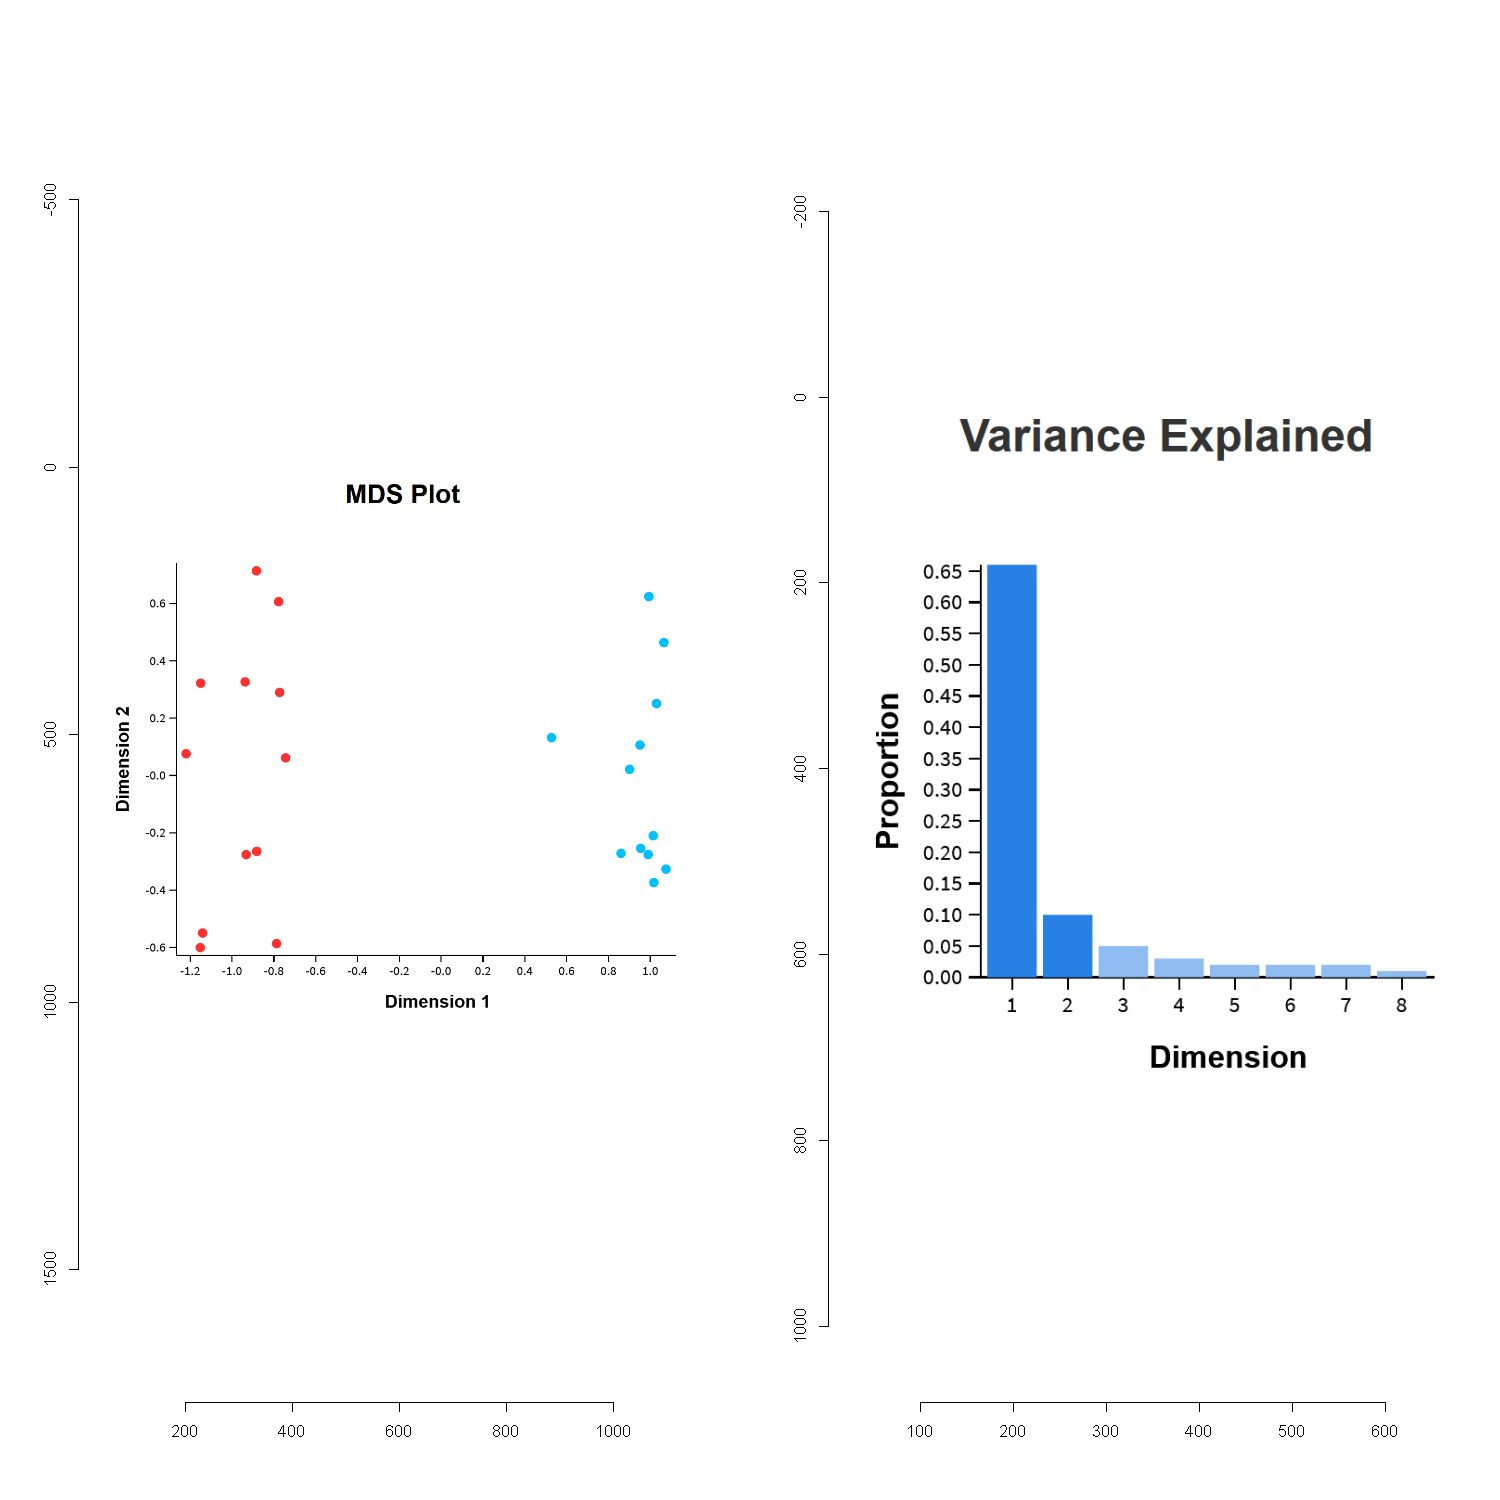

In [32]:
#glMDSPlot(CTA_Bioprobe_QC_DGE, groups = CTA_Bioprobe_QC_DGE$samples$group )
par(mfrow=c(1,2))
plot(load.image("Analysis_Onkar/CTA/MDS.png"))
plot(load.image("Analysis_Onkar/CTA/Var_MDS.png"))

## Variance Explained - 65% and 10%

In [33]:
logcounts_cta <- cpm.DGEList(CTA_Bioprobe_QC_DGE,log=TRUE)
var_genes_CTA <- apply(logcounts_cta, 1, var)
select_var <- names(sort(var_genes_CTA, decreasing=TRUE))[1:50]
highly_variable_lcpm <- logcounts_cta[select_var,]

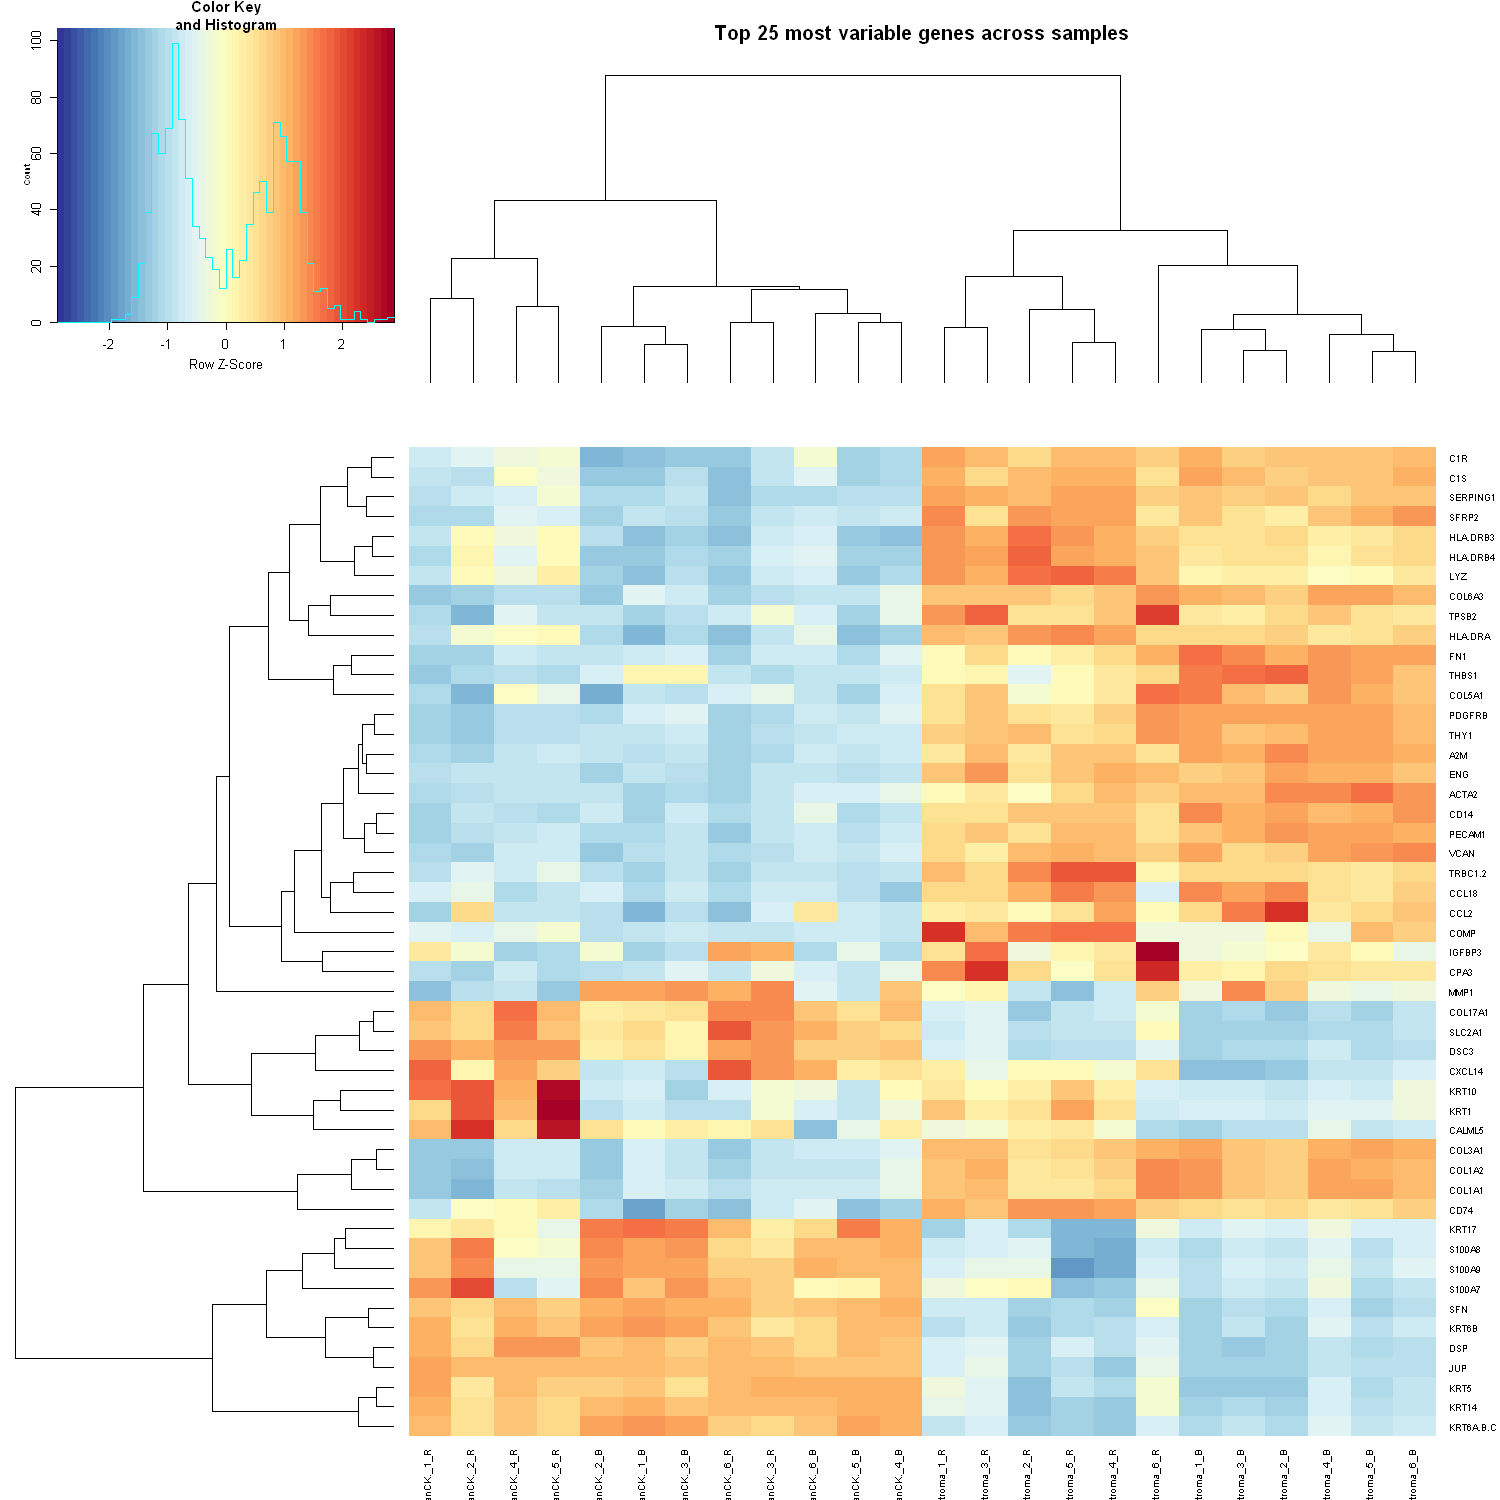

In [34]:
mypalette <- brewer.pal(11,"RdYlBu")
morecols <- colorRampPalette(mypalette)
col.cell <- c("purple","orange")[CTA_Bioprobe_QC_DGE$samples$group]
# Plot the heatmap
highly_variable_lcpm_heatmap <- data.frame(highly_variable_lcpm)
colnames(highly_variable_lcpm_heatmap) <- substring(colnames(highly_variable_lcpm),1,10)
heatmap.2(as.matrix(highly_variable_lcpm_heatmap),col=rev(morecols(50)),trace="none", main="Top 25 most variable genes across samples",ColSideColors=col.cell,scale="row")

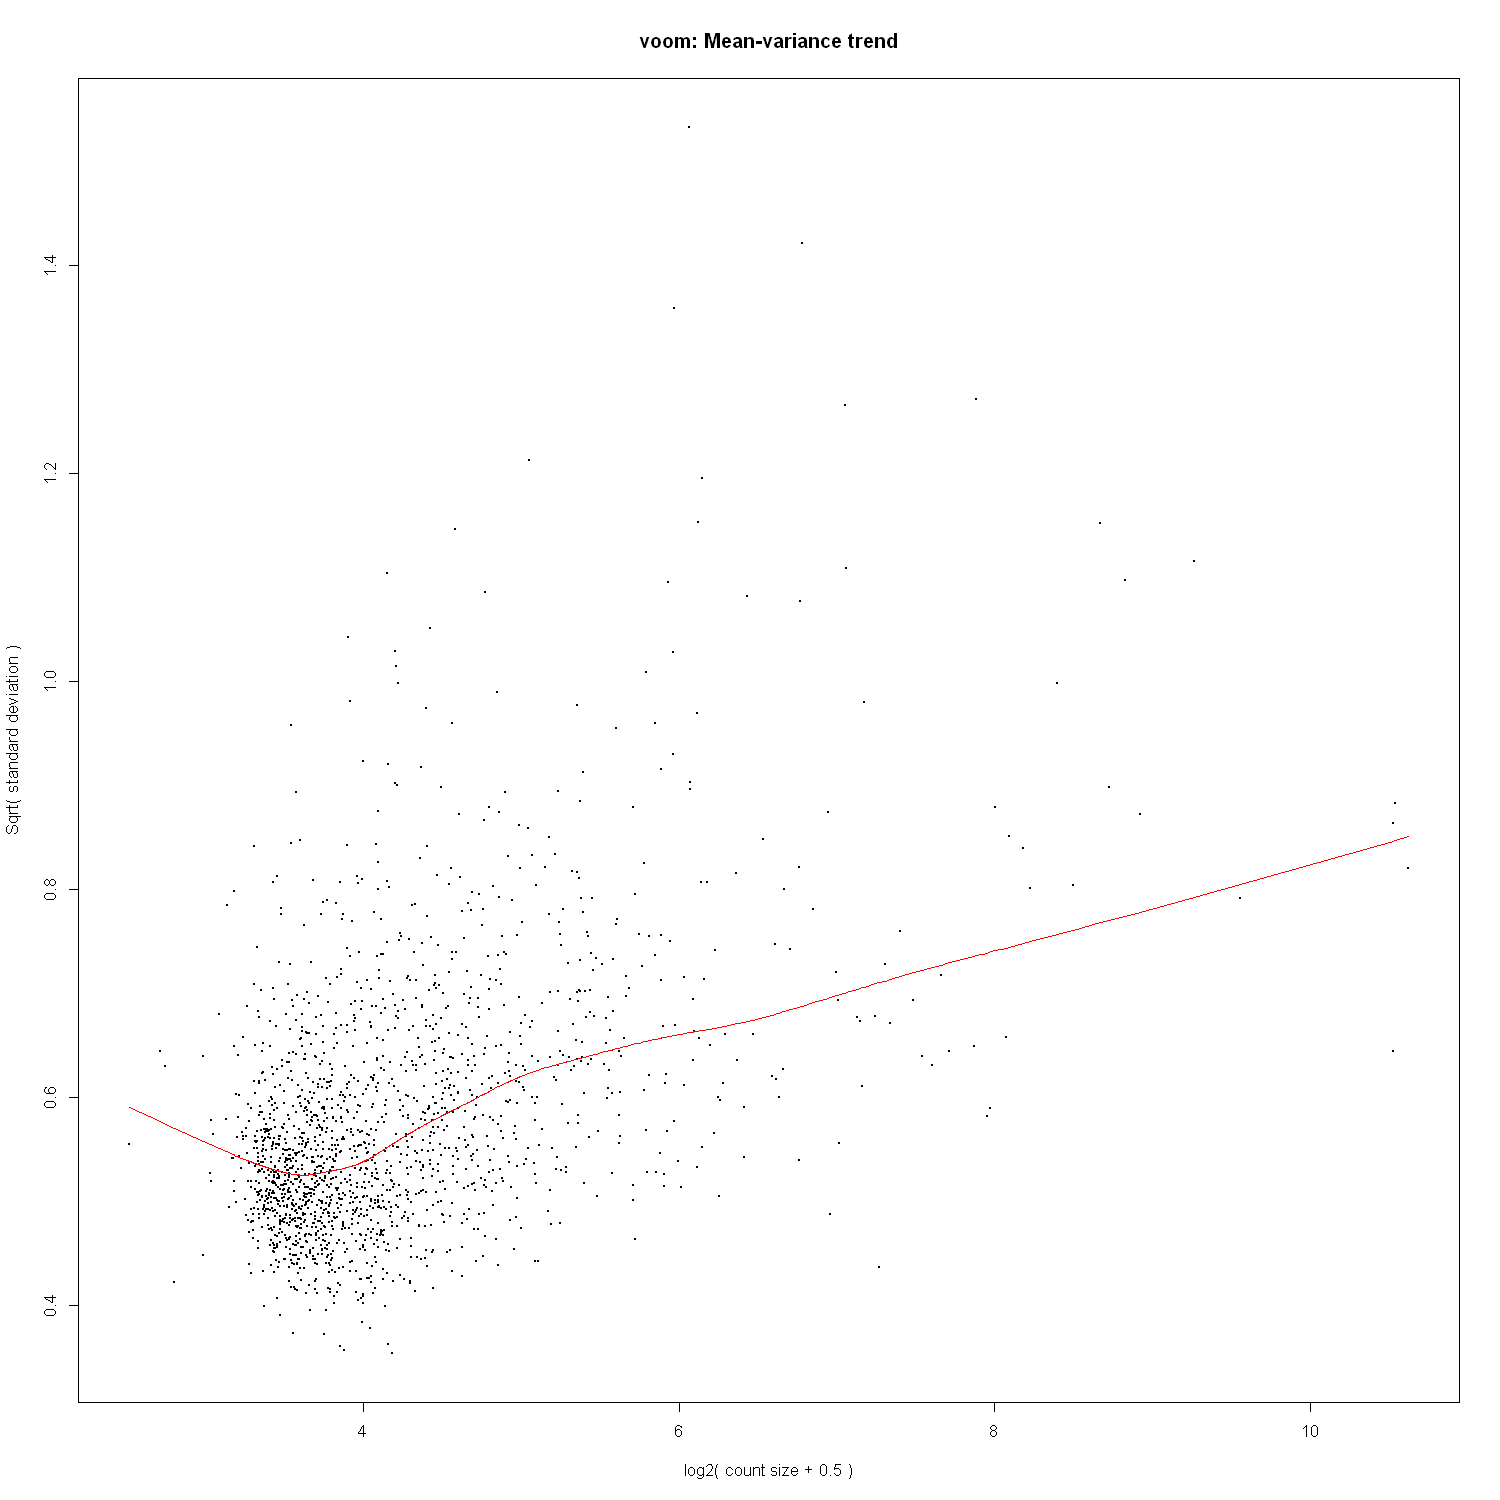

In [35]:
CTA_Bioprobe_QC_DGE <- calcNormFactors(CTA_Bioprobe_QC_DGE)
design <- model.matrix(~ 0 + CTA_Bioprobe_QC_DGE$samples$group)
colnames(design) <- substring(colnames(design),34)
colnames(design) <- substring(colnames(design),1,5)
par(mfrow=c(1,1))
v <- voom(CTA_Bioprobe_QC_DGE,design,plot = TRUE)

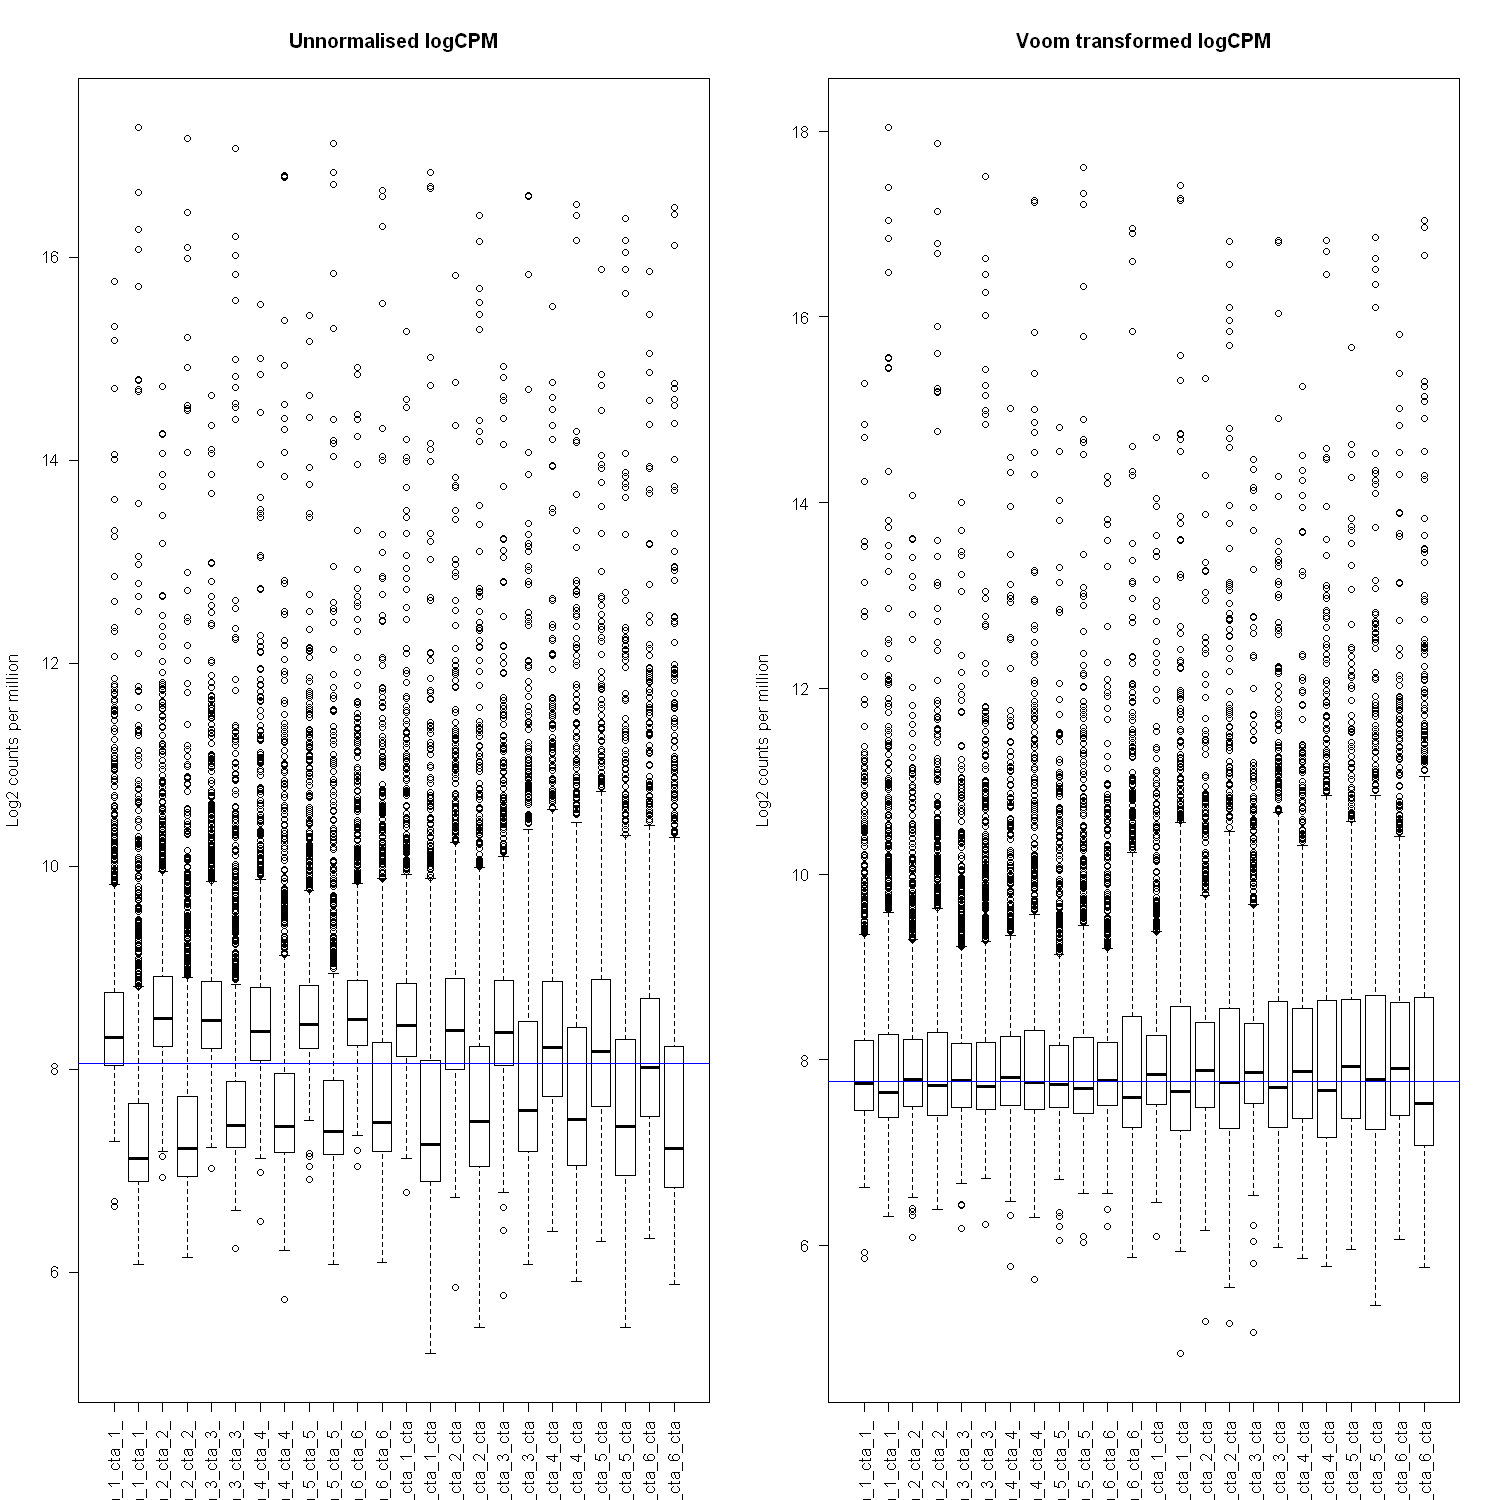

In [36]:
par(mfrow=c(1,2))
boxplot(logcounts_cta, xlab="", ylab="Log2 counts per million",las=2,main="Unnormalised logCPM")
abline(h=median(logcounts_cta),col="blue")
boxplot(v$E, xlab="", ylab="Log2 counts per million",las=2,main="Voom transformed logCPM")
abline(h=median(v$E),col="blue")

       StromvsPanck
Down            455
NotSig          903
Up              467

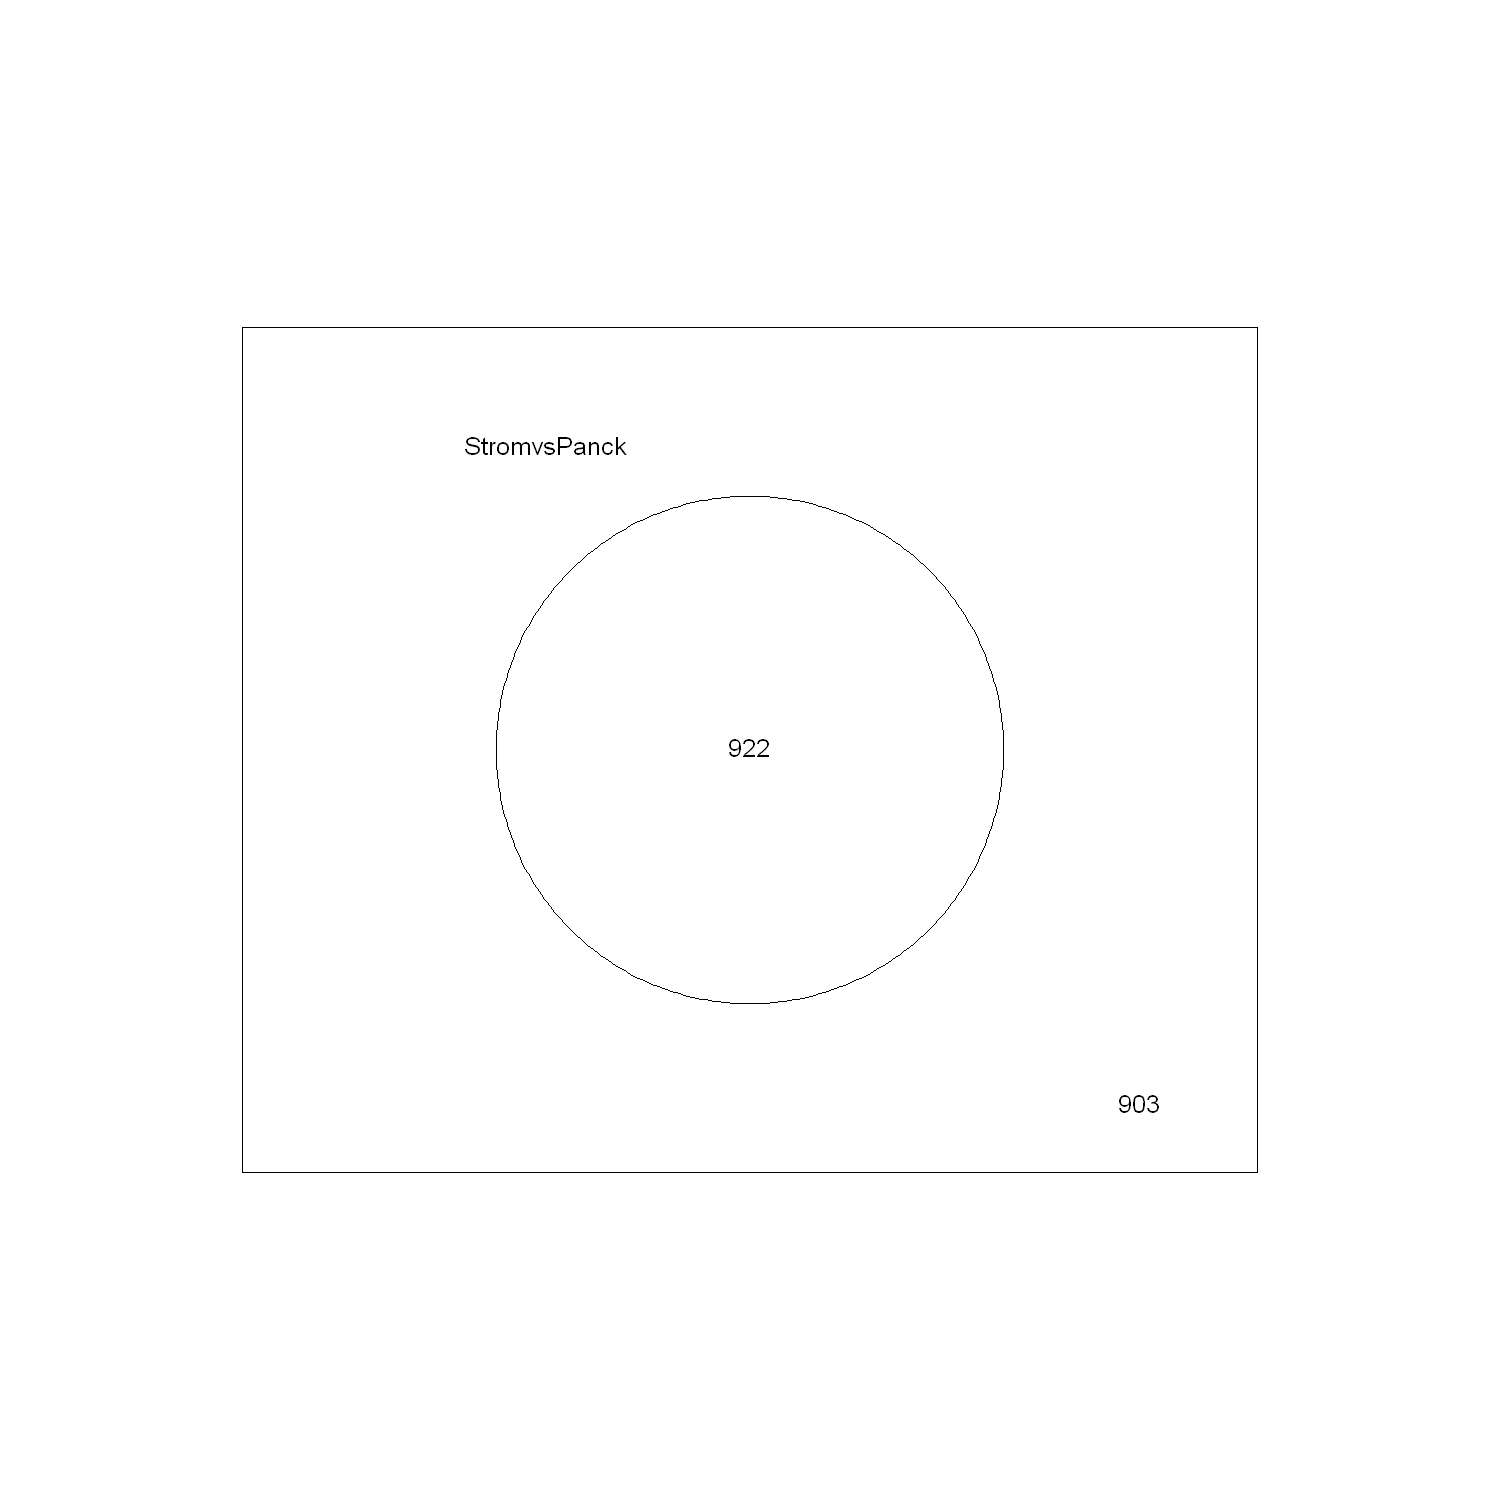

In [37]:
fit <- lmFit(v)
colnames(design) <- substring(colnames(design),1,5)
cont.matrix <- makeContrasts(StromvsPanck=Strom - PanCK,levels=design)
fit.cont <- contrasts.fit(fit, cont.matrix)
fit.cont <- eBayes(fit.cont)
summa.fit <- decideTests(fit.cont)
summary(summa.fit)
vennDiagram(summa.fit)

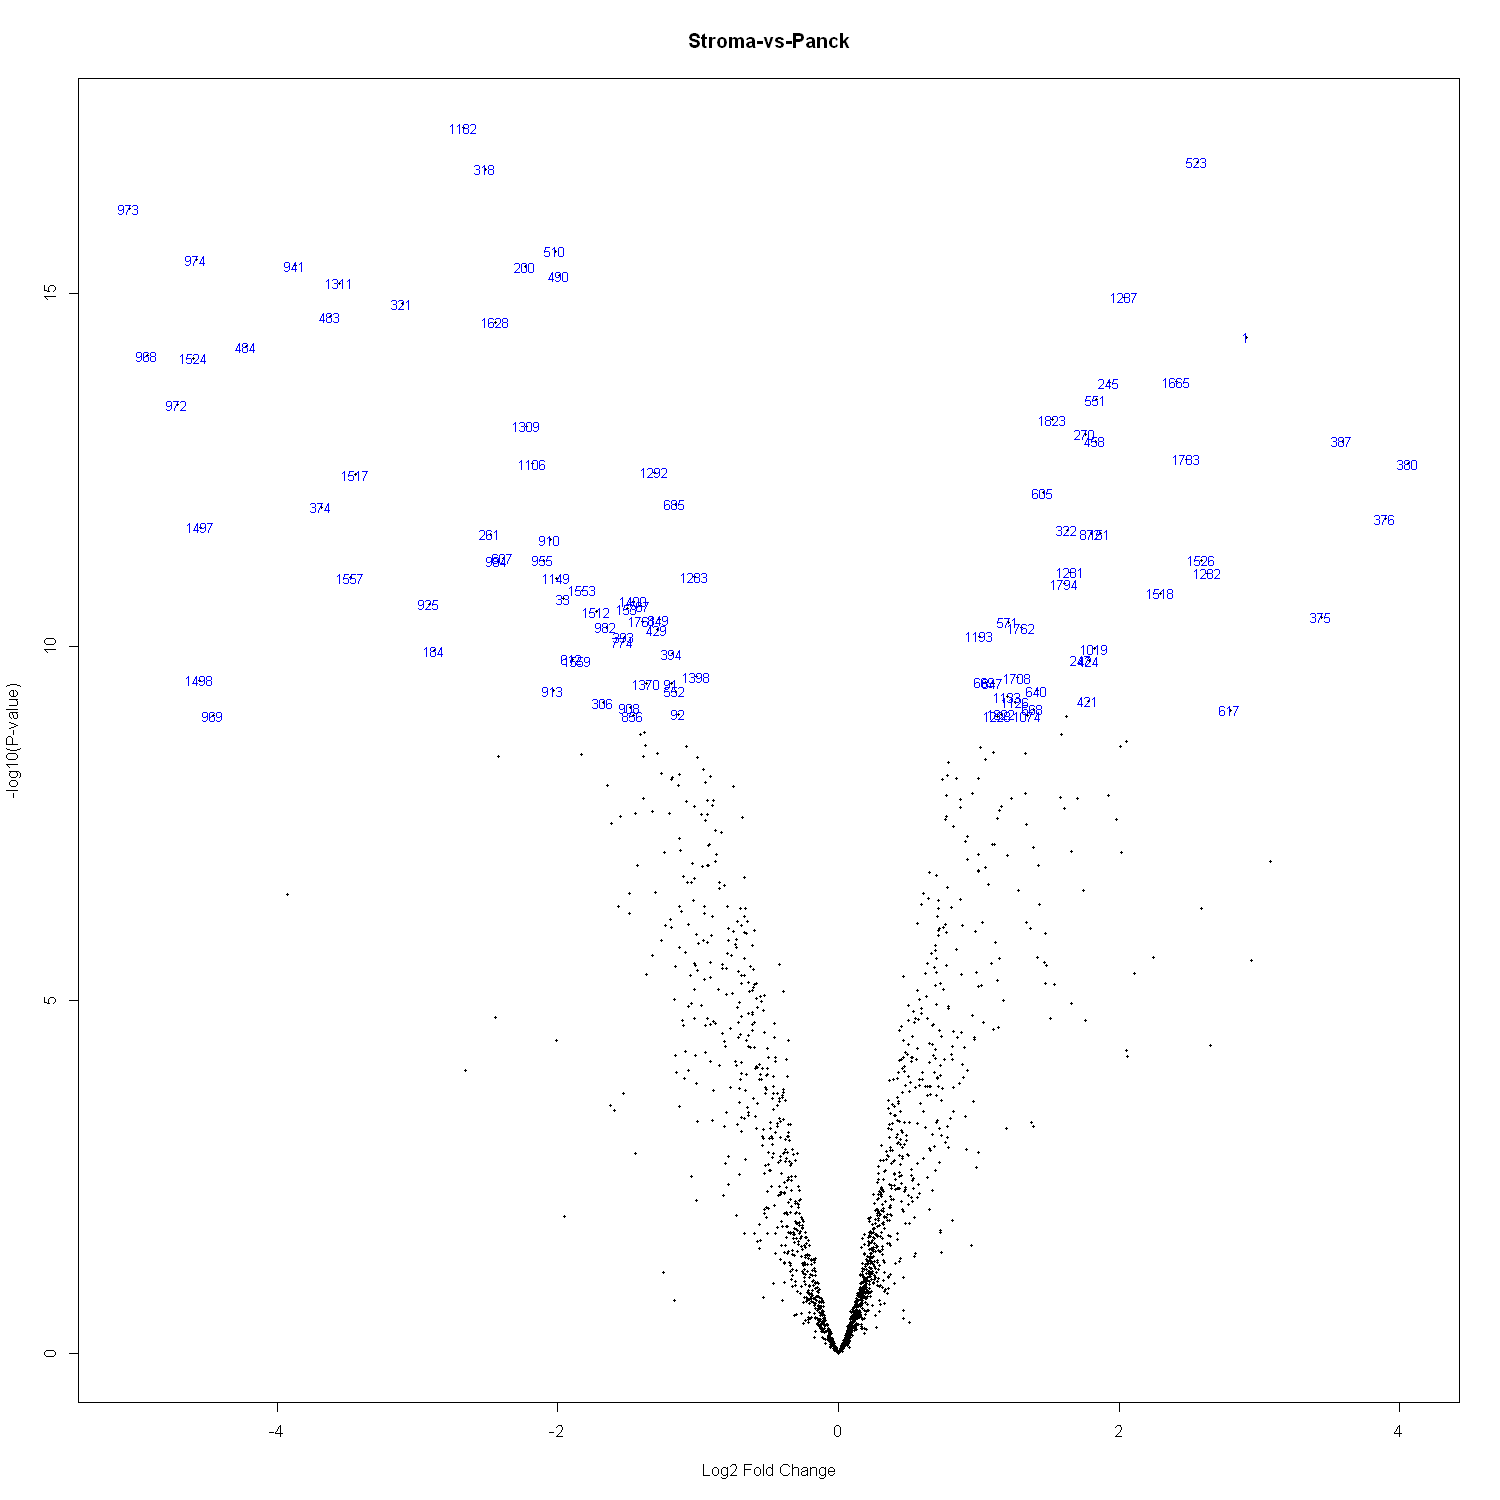

In [38]:
# Volcano Plot
par(mfrow=c(1,1))
#plotMD(fit.cont,coef=1,status=summa.fit[,"Stroma-vs-Panck"], values = c(-1, 1), hl.col=c("blue","red"))
volcanoplot(fit.cont,coef=1,highlight=100,names=fit.cont$genes$SYMBOL, main="Stroma-vs-Panck")

In [43]:
group2 <- CTA_Bioprobe_QC_DGE$samples$group
levels(group2) <- c("Stroma", "PanCK+")
glXYPlot(x=fit.cont$coefficients[,1], y=fit.cont$lods[,1],
         xlab="logFC", ylab="B", main="Stroma vs Panck",
         counts=v$E, groups=group2, status=summa.fit[,1],
         anno=fit.cont$genes, side.main="Gene", folder="volcano")

### NECTIN, KRT6, CDH1 etc high in Panck and ENG, PECAM, high in Stroma

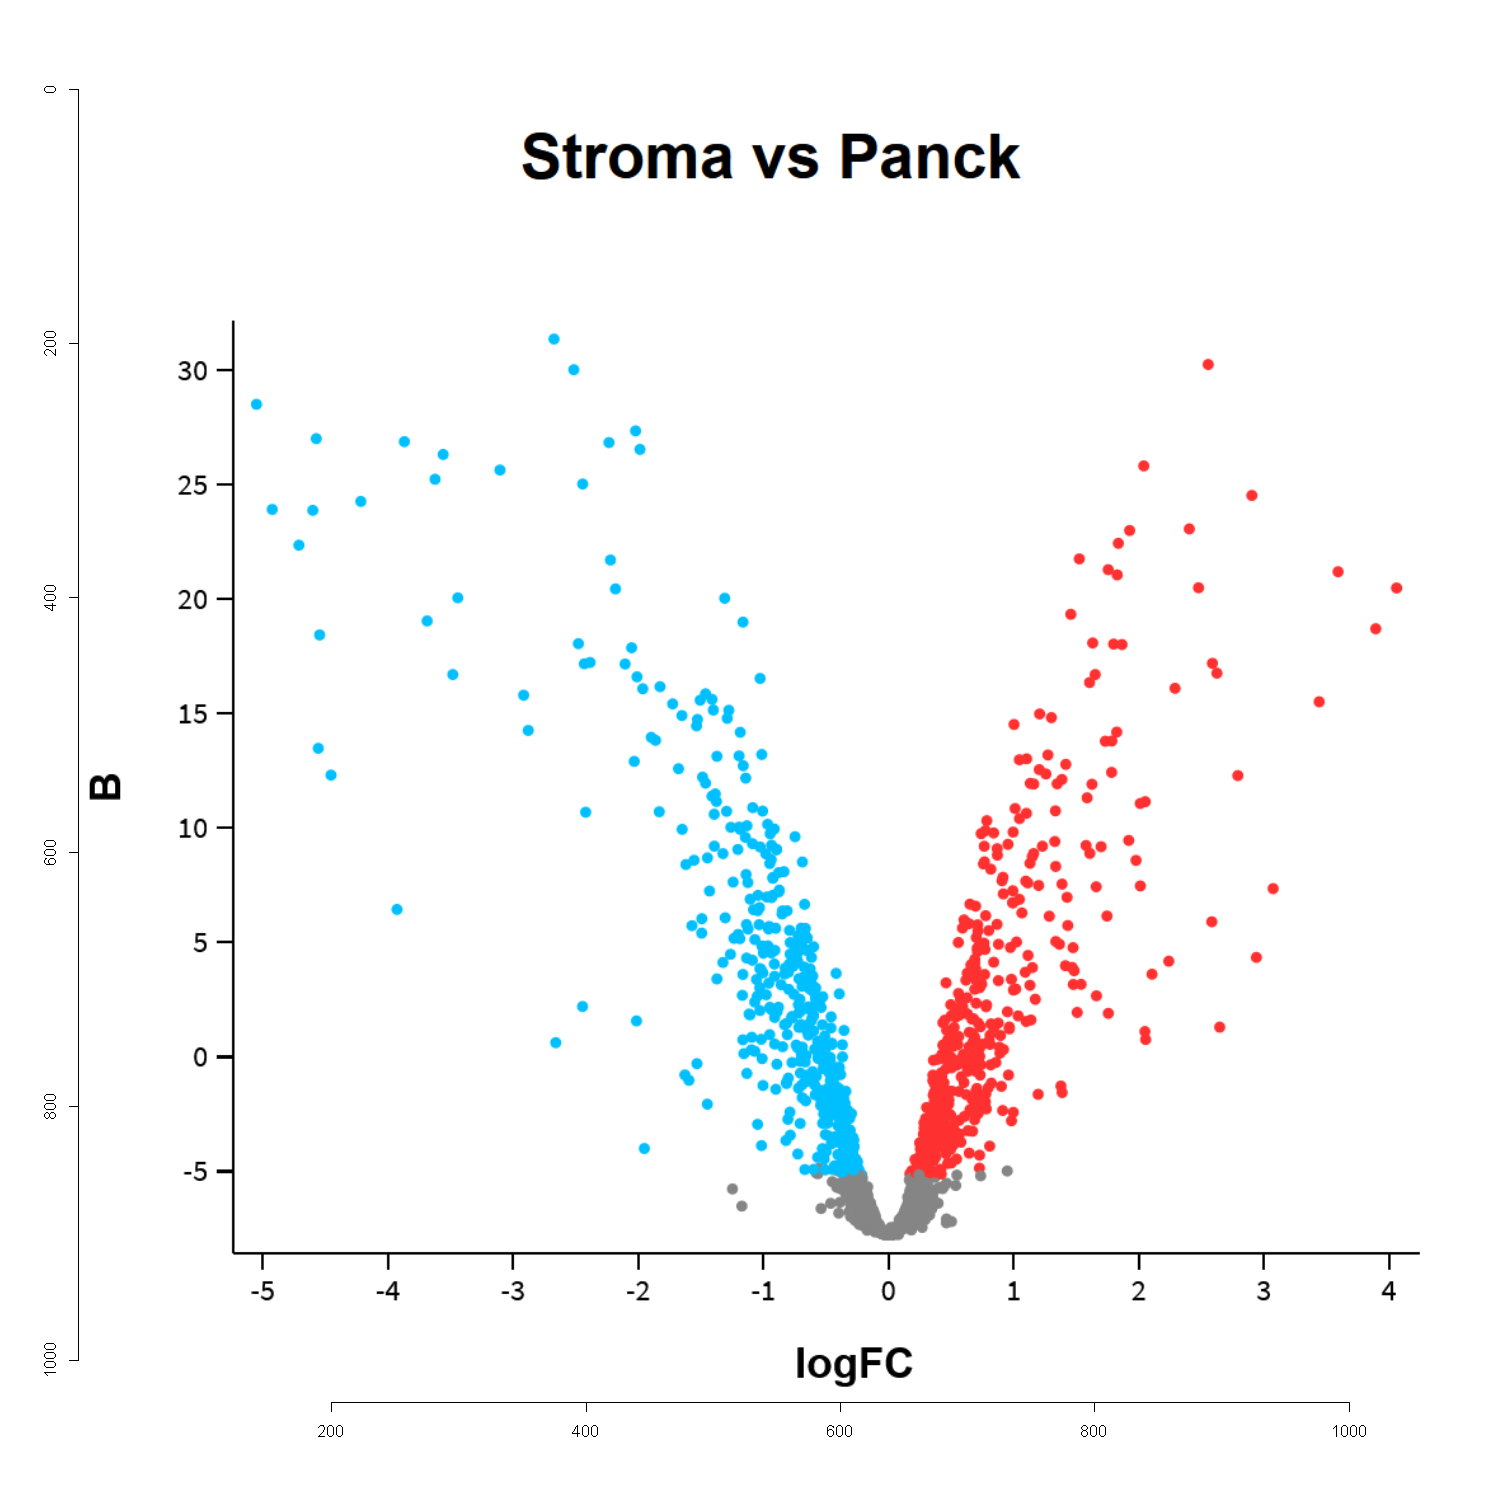

In [39]:
par(mfrow=c(1,1))
plot(load.image("Analysis_Onkar/CTA/Volcano.png"))

# Using Seurat for FeaturePlot

In [ ]:
library(SingleCellExperiment)
library(Seurat)
library(patchwork)
library(SeuratData)
library(reshape2)
library(ComplexHeatmap)
options(warn=-1)

In [ ]:
CTA_Bioprobe_QC_SC <- as.data.frame(t(CTA_Bioprobe_QC_SC)) 

sce_cta = SingleCellExperiment(assays = list(counts=data.matrix(CTA_Bioprobe_QC_SC)),
                                   colData = data.frame(cell = colnames(CTA_Bioprobe_QC_SC)),
                                   rowData = data.frame(gene = rownames(CTA_Bioprobe_QC_SC)))
assay(sce_cta, "logcounts") <- log2(counts(sce_cta) + 1)
seurat_cta <- as.Seurat(sce_cta)

seurat_cta <- CreateSeuratObject(data.matrix(CTA_Bioprobe_QC_SC), project = "SeuratProject-CTA_QC", assay = "RNA",
                                     min.cells = 0, min.features = 0, names.field = 1,
                                     names.delim = "_", meta.data = NULL)

VlnPlot(seurat_cta, features = c("nCount_RNA"), ncol = 2)

#Normalize
seurat_cta <- NormalizeData(object = seurat_cta, normalization.method = "LogNormalize", scale.factor = 10000)

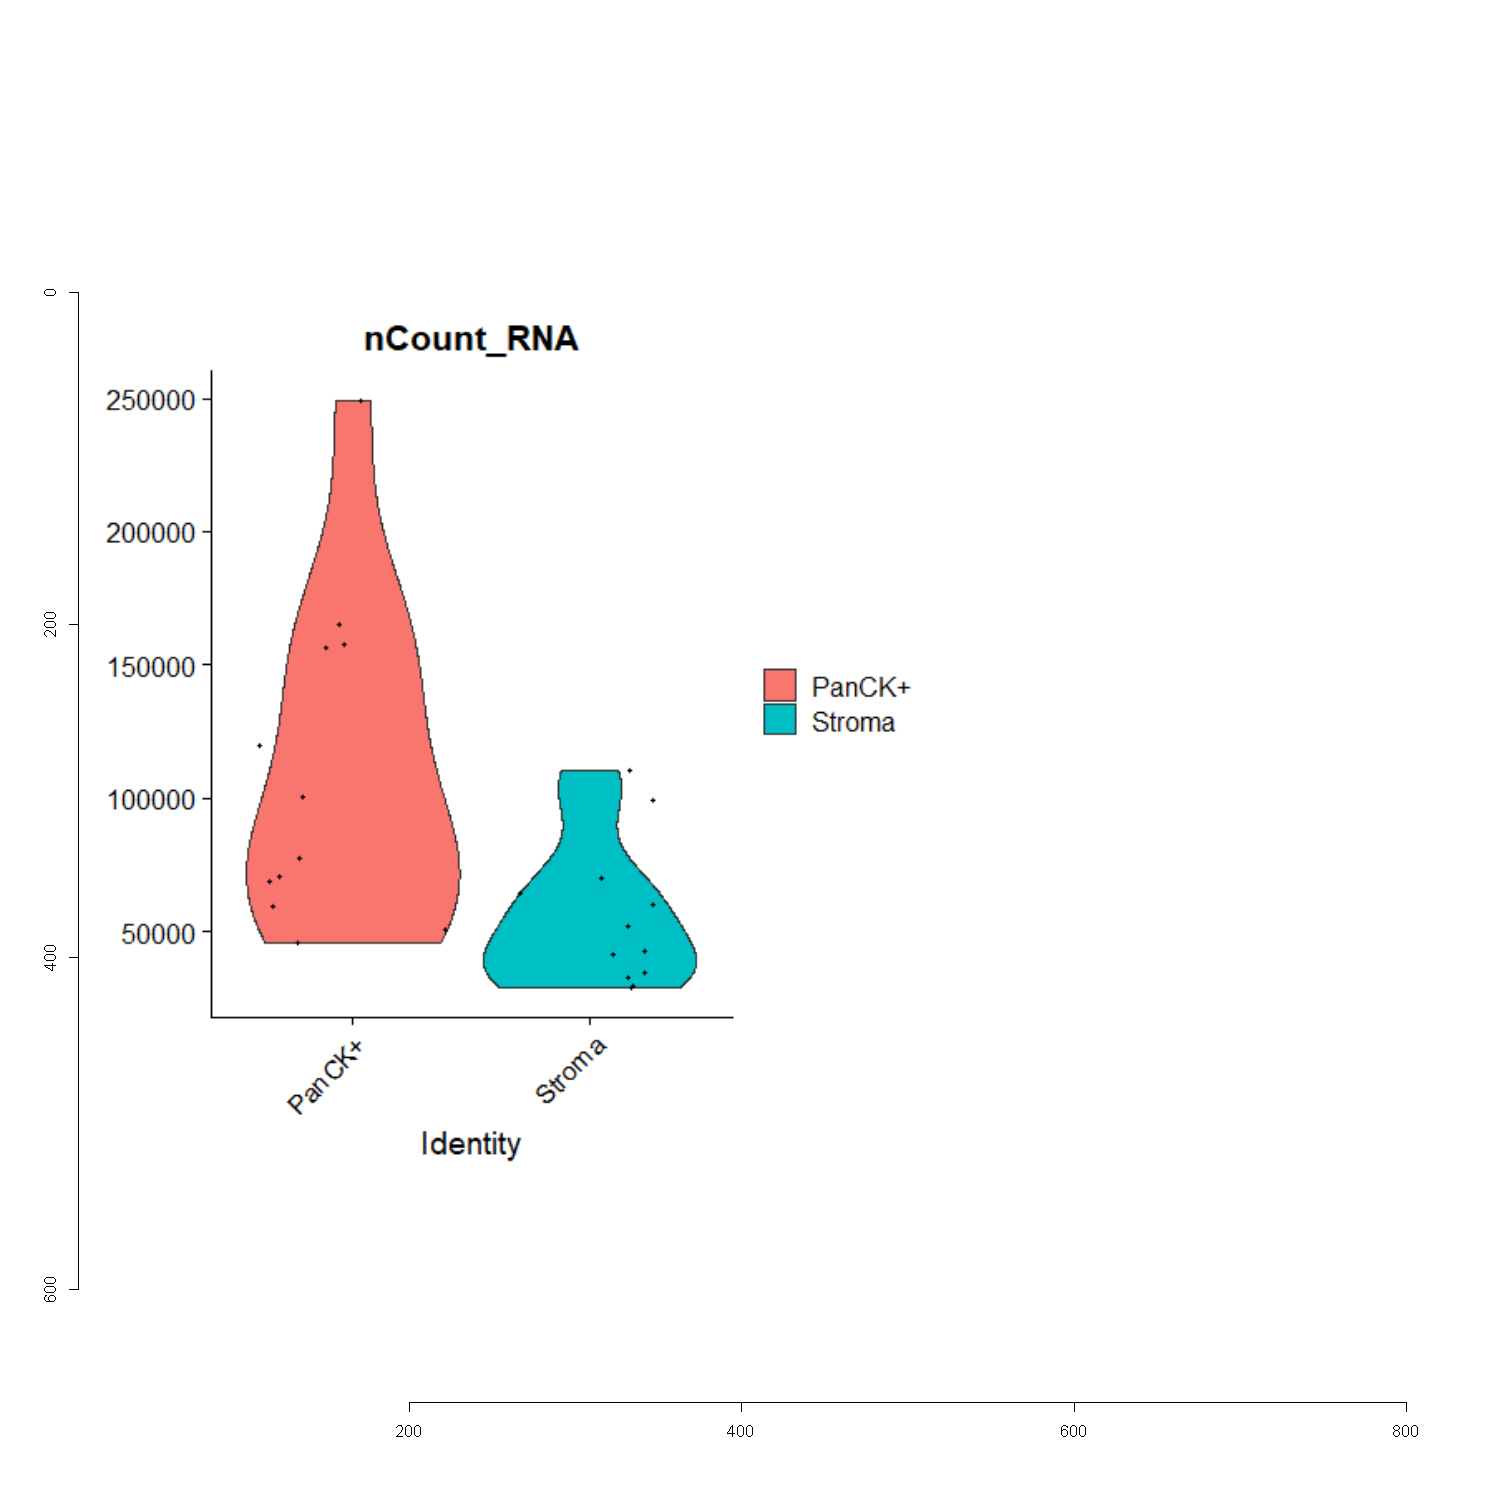

In [40]:
plot(load.image("Analysis_Onkar/CTA/ncount_RNA.png"))

In [ ]:
#Top_20
top20_cta <- head(VariableFeatures(seurat_cta), 20)
head(x = HVFInfo(object = seurat_cta))


#plot variable features with and without labels for the craic / sanity test
plot1_cta <- VariableFeaturePlot(seurat_cta)
plot1_cta <- LabelPoints(plot = plot1_cta, points = top20_cta, repel = T)
plot1_cta

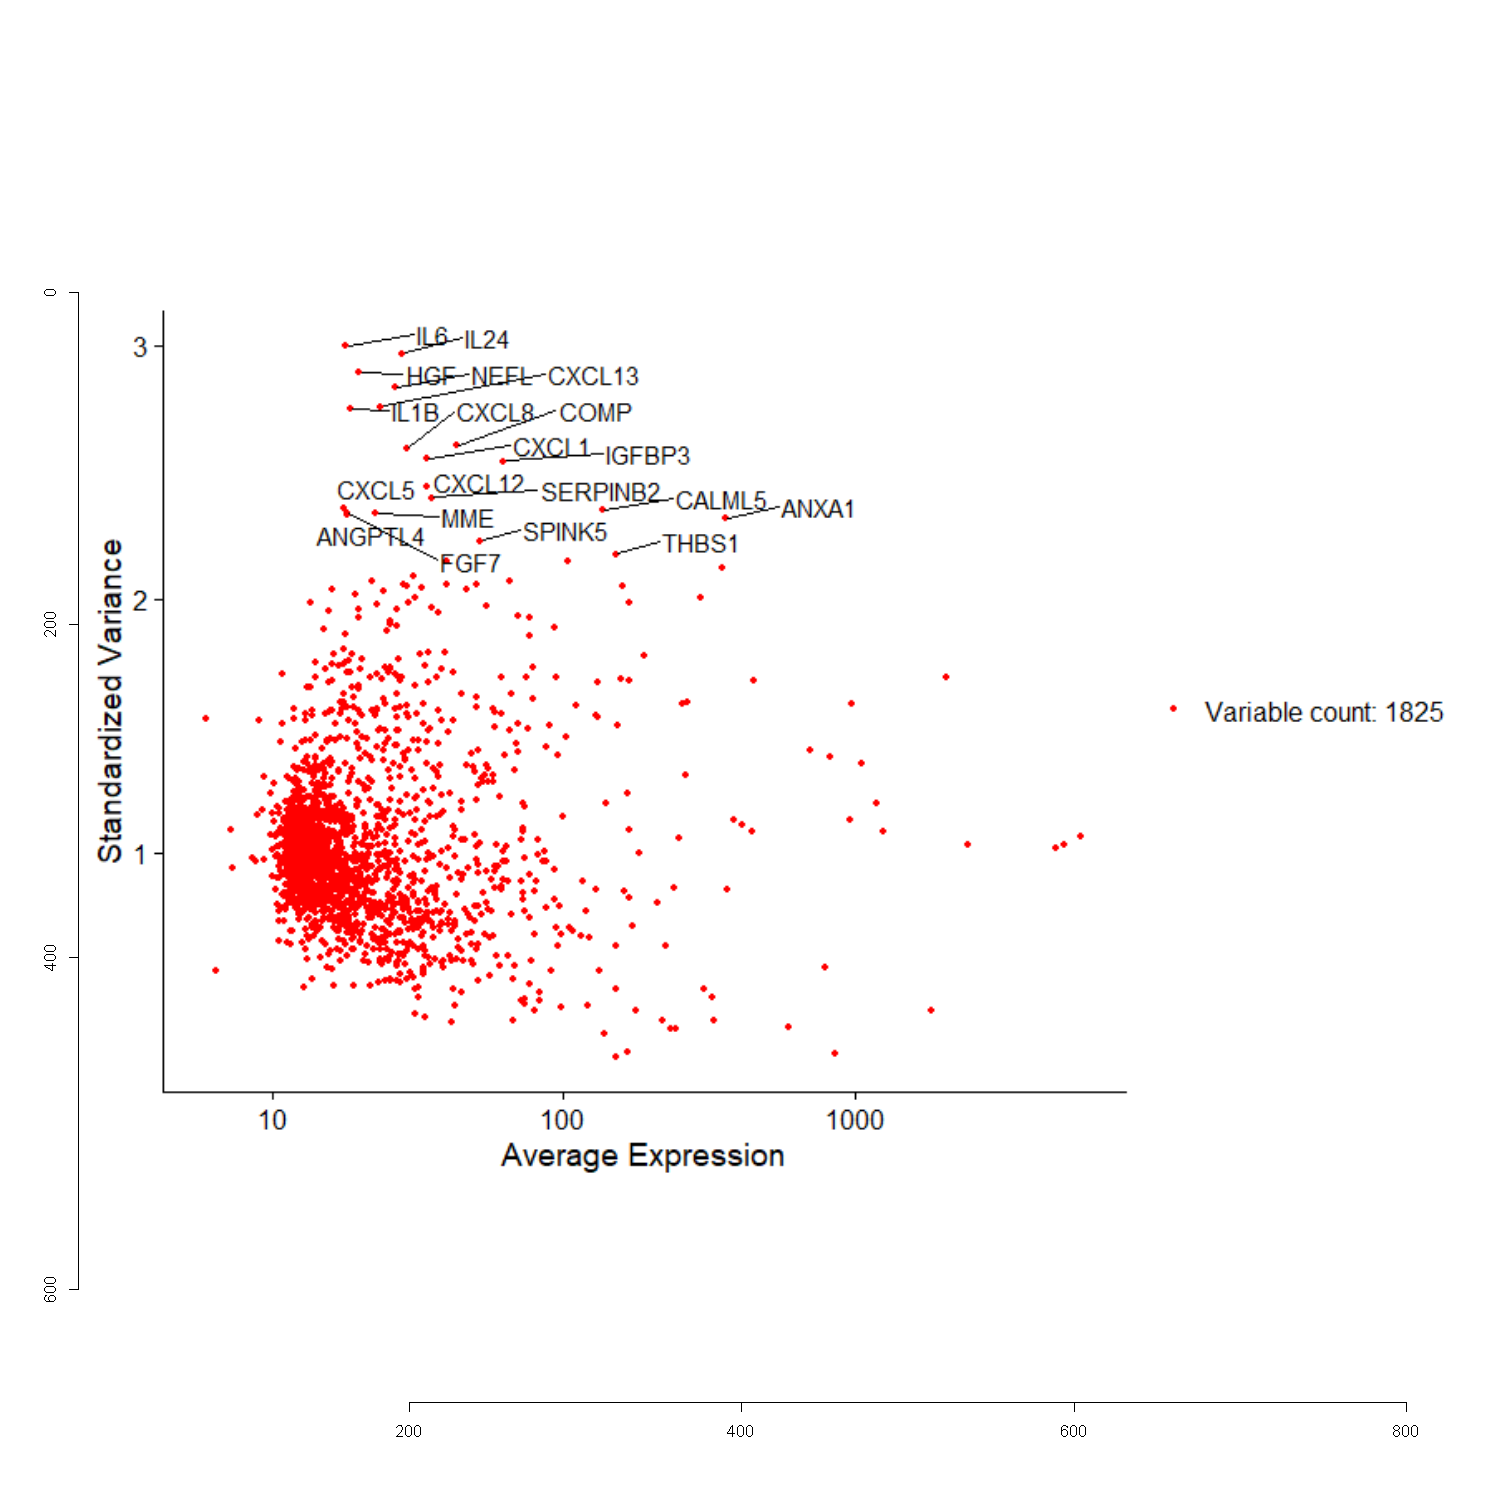

In [41]:
plot(load.image("Analysis_Onkar/CTA/Variable_Count.png"))

In [ ]:
##seurat_protein <- ScaleData(seurat_protein, features = all.genes_protein)
seurat_cta <- ScaleData(object = seurat_cta, vars.to.regress = c("nCount_RNA"))

#Dimensionality Reduction
seurat_cta <- RunPCA(seurat_cta, npcs = 12, verbose = FALSE)
DimPlot(object = seurat_cta, reduction = "pca")
#DimPlot(object = seurat_protein, reduction = "GAPDH")
ElbowPlot(seurat_protein)
DimHeatmap(object = seurat_cta, reduction = "pca", cells = 24, balanced = TRUE)

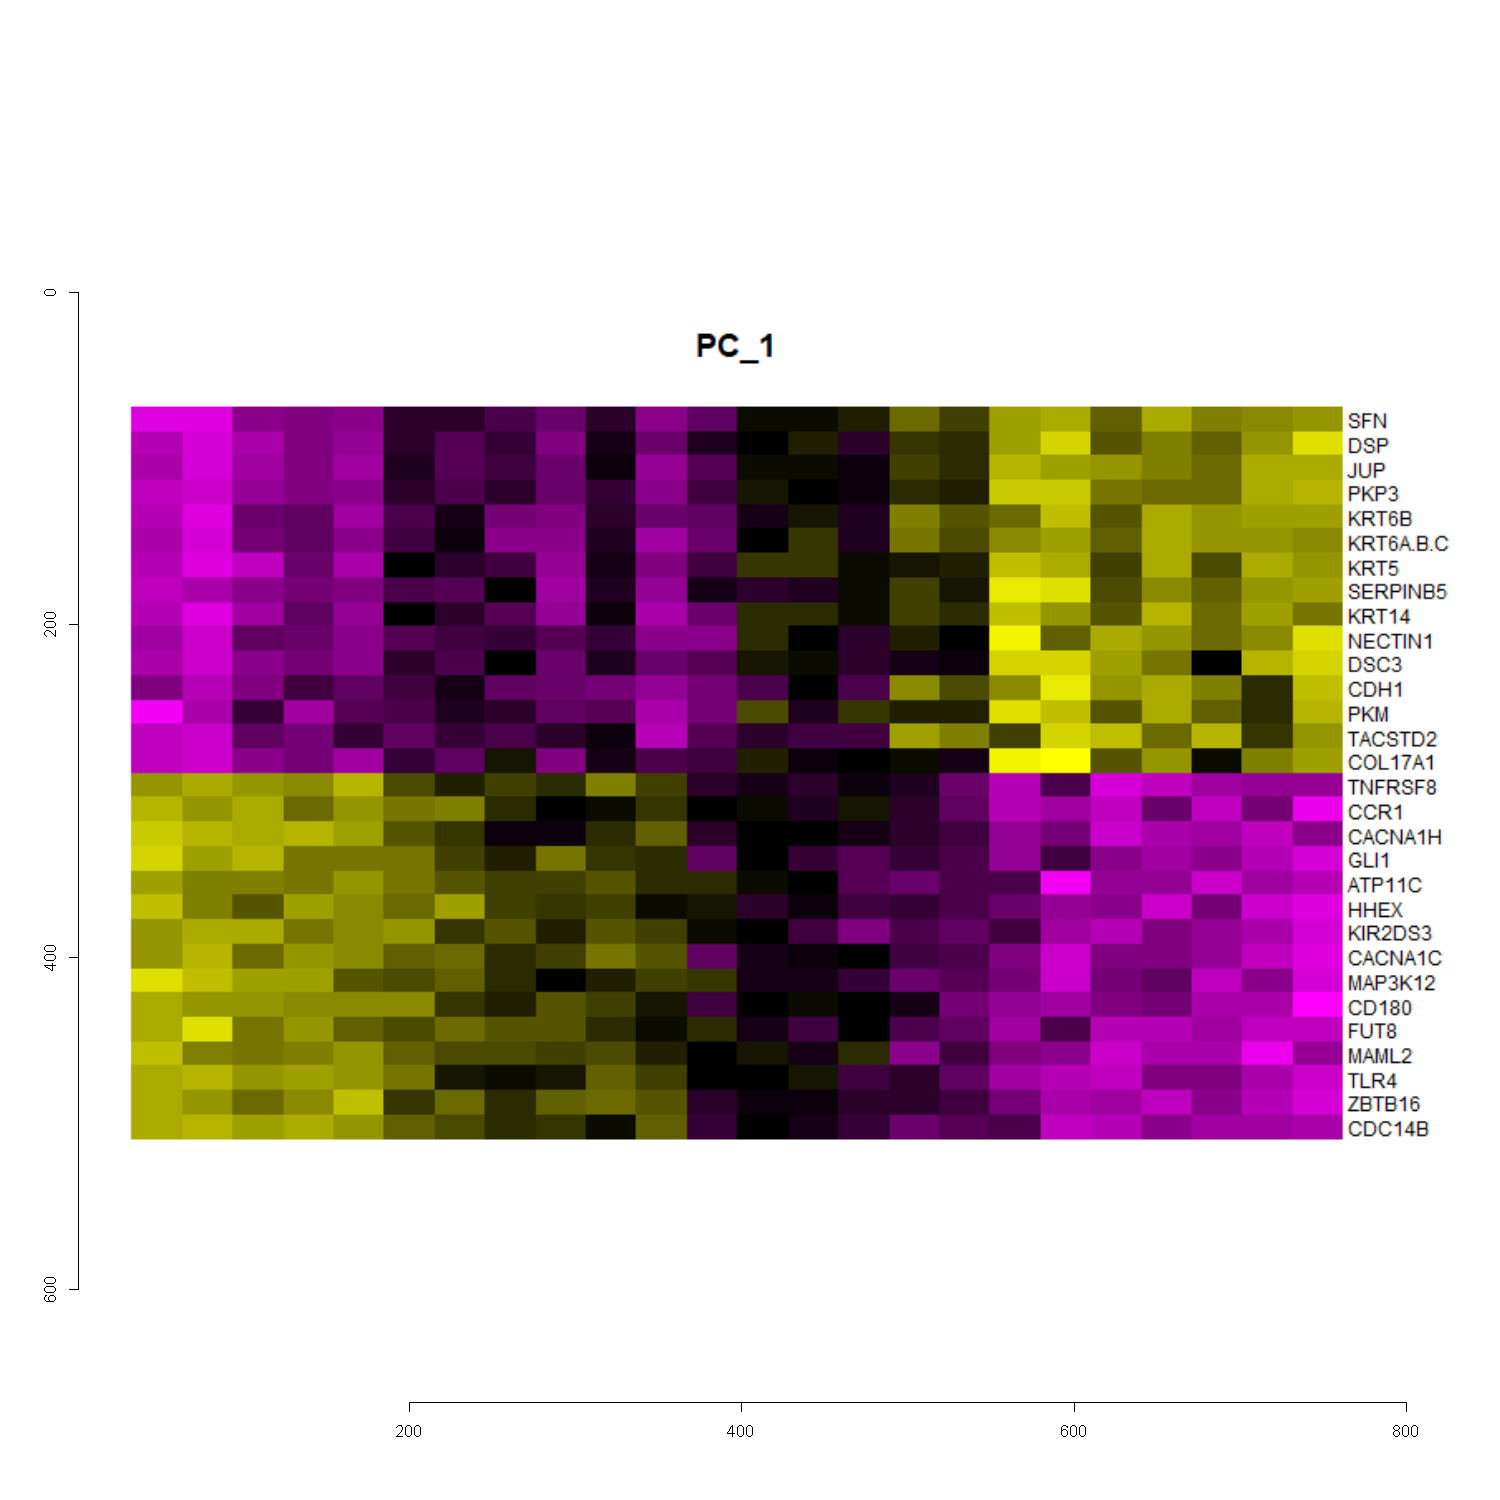

In [42]:
plot(load.image("Analysis_Onkar/CTA/Dim_Heatmap.png"))

In [ ]:
seurat_cta <- FindNeighbors(seurat_cta, reduction = "pca", dims = 1:10)
seurat_cta <- FindClusters(seurat_cta, resolution = 0.05, algorithm = 1)
seurat_cta <- RunUMAP(seurat_cta, dims = 1:10, n.neighbors = 5,min.dist = .01,spread = 6, n.components = 10,verbose = F) ## twiddle the dials to get umaps of face validity
seurat_cta <- RunTSNE(object = seurat_cta, dims.use = 1:10, do.fast = TRUE, perplexity=5)
DimPlot(object = seurat_cta, reduction = "tsne")
DimPlot(seurat_cta, reduction = "umap", split.by = "seurat_clusters")


#Feature Plots
FeaturePlot(object = seurat_cta, features = c("NECTIN", "KRT6",), cols = c("red", "blue"), reduction = "umap")

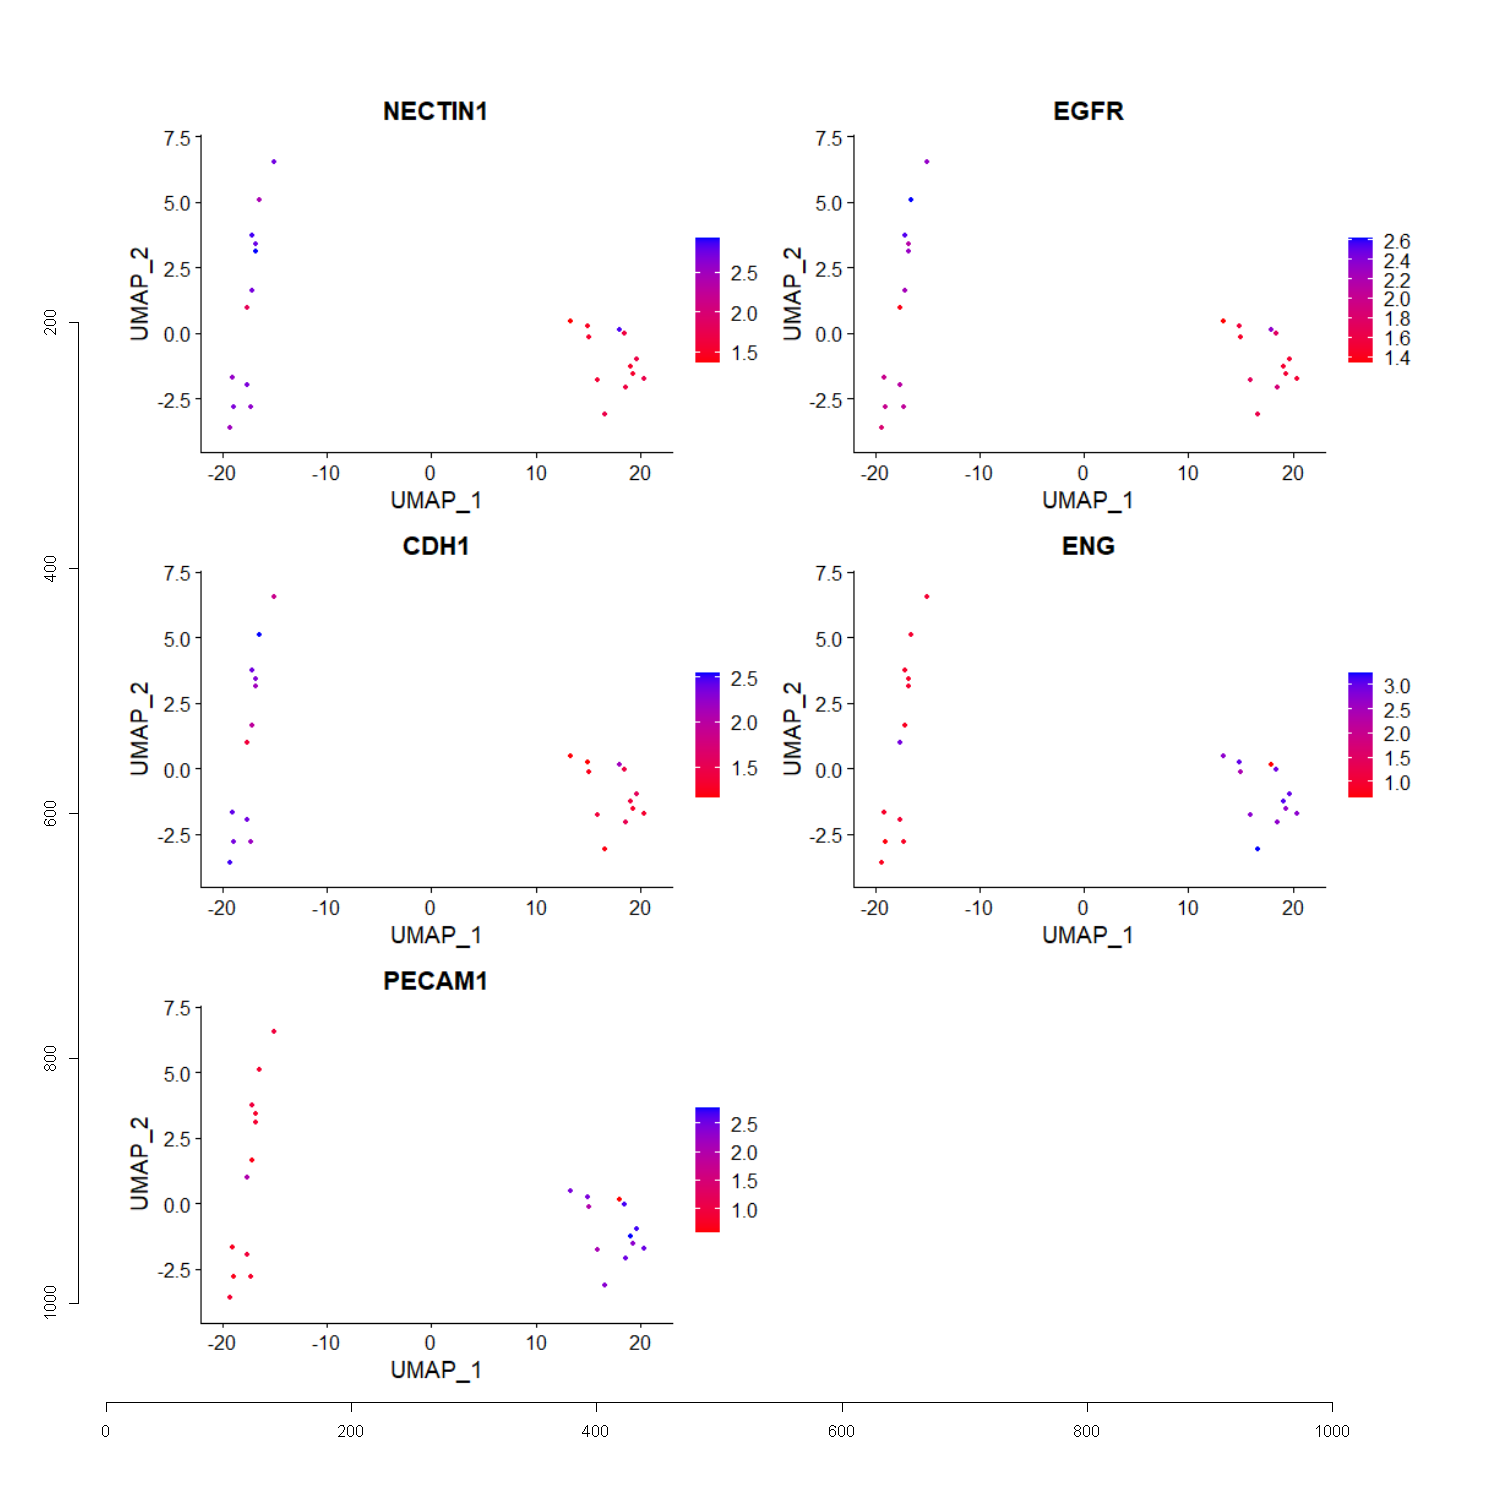

In [44]:
plot(load.image("Analysis_Onkar/CTA/F_Plot.png"))

# Protein Data

In [48]:
Protein_QC_SC <- read.csv("Protein_QC_SC.csv", row.names=1)
Protein_QC_SC <- as.data.frame(t(Protein_QC_SC)) 
head(Protein_QC_SC)

,GAPDH,Histone.H3,S6,Ms.IgG1,Ms.IgG2a,Rb.IgG,Bcl.2,Beta.2.microglobulin,CD11c,CD127,...,MART1,NY.ESO.1,PanCk,PD.1,PD.L1,PD.L2,PR,PTEN,S100B,SMA
Stroma_1_SCC_B18_1_SCC_B18,13390.65,29981.27,10510.03,107.69,17.35,171.18,202.83,452.67,458.80,299.88,...,24.78,81.33,482.08,47.26,23.60,11.96,15.62,117.82,305.22,20413.74
PanCK._1_SCC_B18_1_SCC_B18,13206.81,19234.74,16610.06,142.42,26.09,88.53,34.25,181.44,136.22,239.96,...,17.93,56.34,18495.87,64.28,13.28,7.57,11.72,35.38,99.17,1674.21
Stroma_2_SCC_B18_2_SCC_B18,11952.03,40355.97,8747.94,104.90,23.77,176.05,294.89,544.79,532.63,294.03,...,38.80,87.61,477.94,70.34,38.31,10.92,19.03,141.99,645.72,27626.28
PanCK._2_SCC_B18_2_SCC_B18,12654.61,24013.37,13885.24,141.18,28.19,101.26,48.13,177.19,139.96,287.59,...,18.88,64.64,17166.54,50.76,13.11,8.97,16.78,44.94,247.37,2182.51
Stroma_3_SCC_B18_3_SCC_B18,14901.42,44570.41,6353.03,107.42,21.97,147.74,177.66,430.29,410.80,253.80,...,34.89,51.37,521.87,47.91,29.42,9.00,19.01,97.08,513.28,12978.22
PanCK._3_SCC_B18_3_SCC_B18,13290.78,24434.12,12992.97,137.14,27.46,75.02,41.09,175.37,138.61,205.96,...,18.87,58.37,15778.53,53.66,18.34,4.98,23.14,46.95,172.66,1754.93


In [49]:
groups <- substring(row.names(Protein_QC_SC),1,6)
head(groups)

[1] "Stroma" "PanCK." "Stroma" "PanCK." "Stroma" "PanCK."

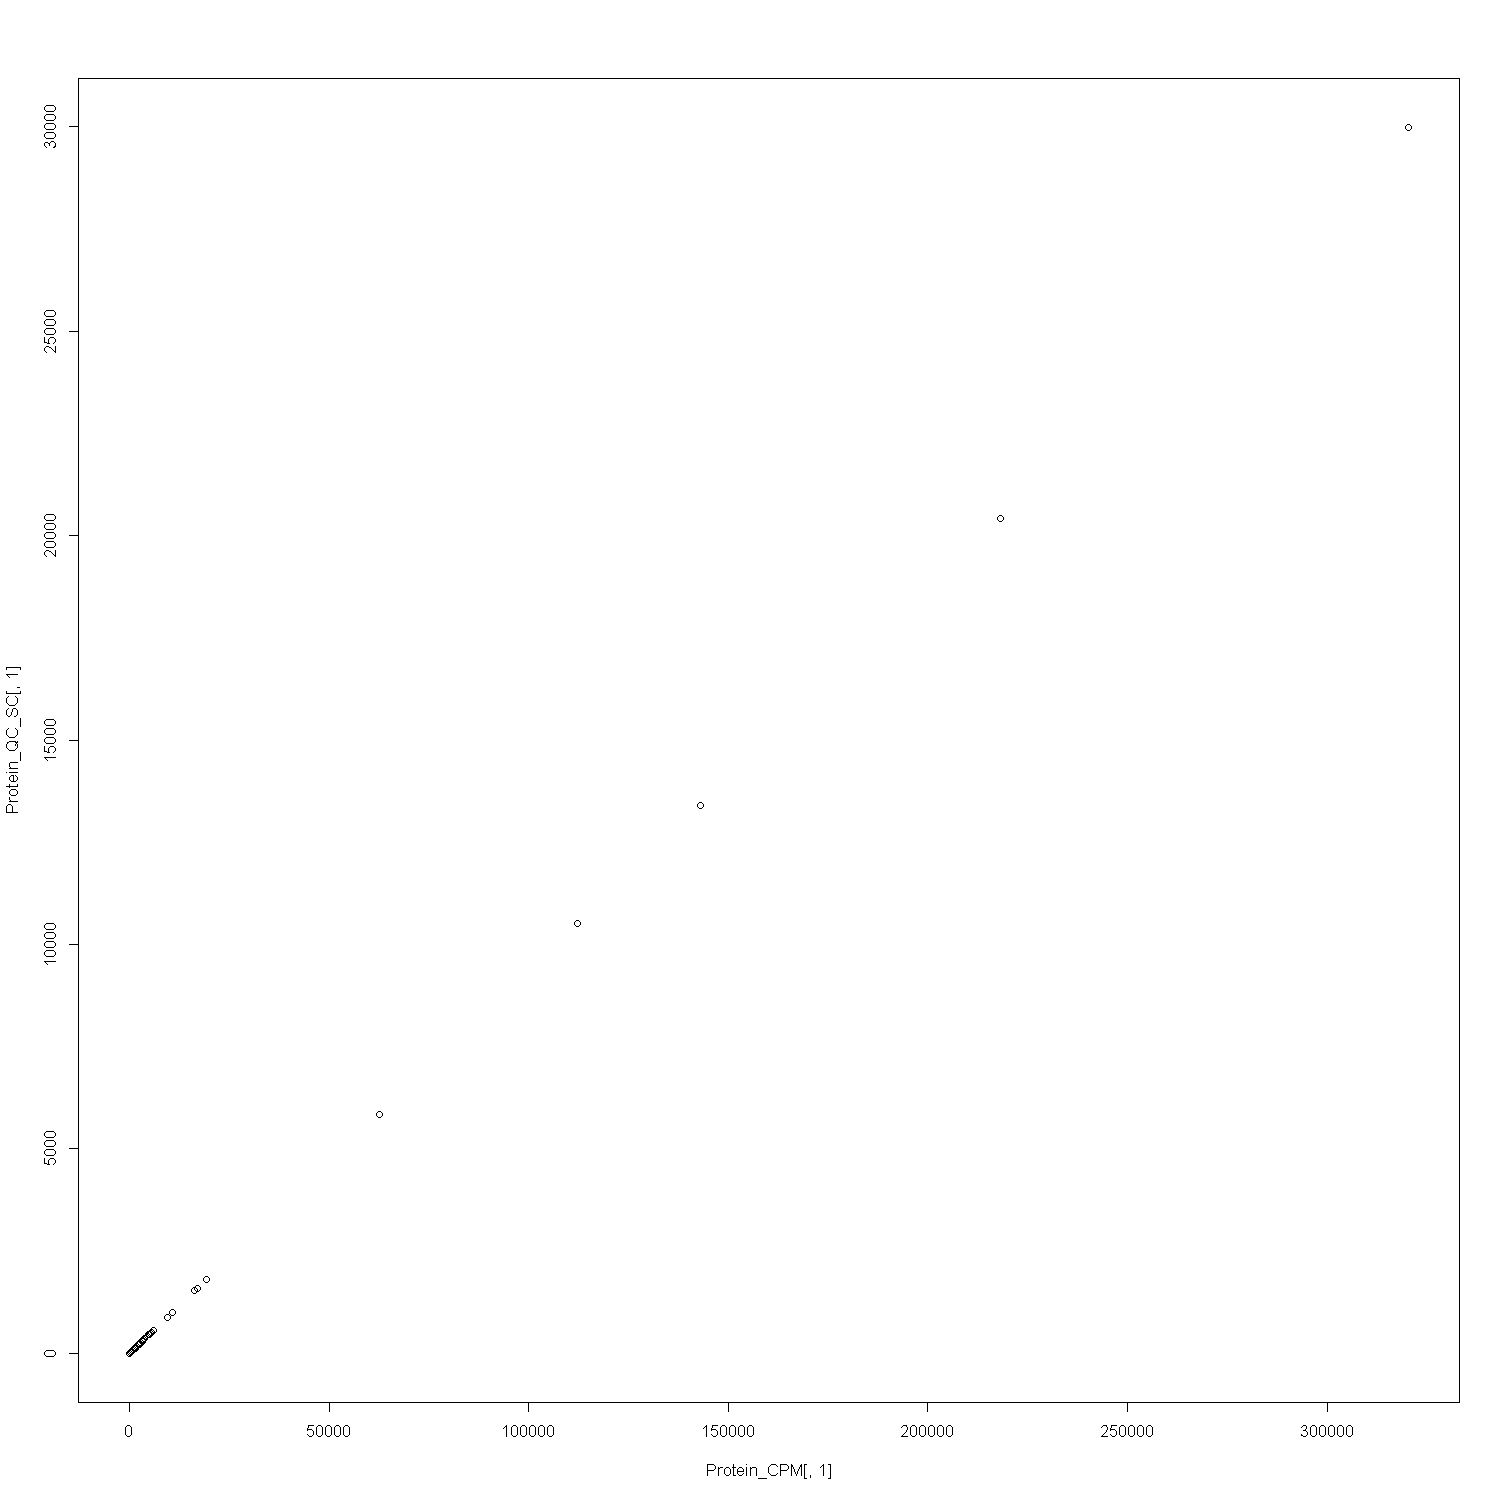

In [50]:
Protein_QC_SC <- as.data.frame(t(Protein_QC_SC)) 
Protein_QC_SC_DGE <- DGEList(Protein_QC_SC)
Protein_QC_SC_DGE$samples$group <- groups
Protein_CPM <- cpm.DGEList(Protein_QC_SC_DGE)
thresh_CTA <- Protein_CPM > 0.5
keep_CTA <- rowSums(thresh_CTA) >= 2
plot(Protein_CPM[,1],Protein_QC_SC[,1])

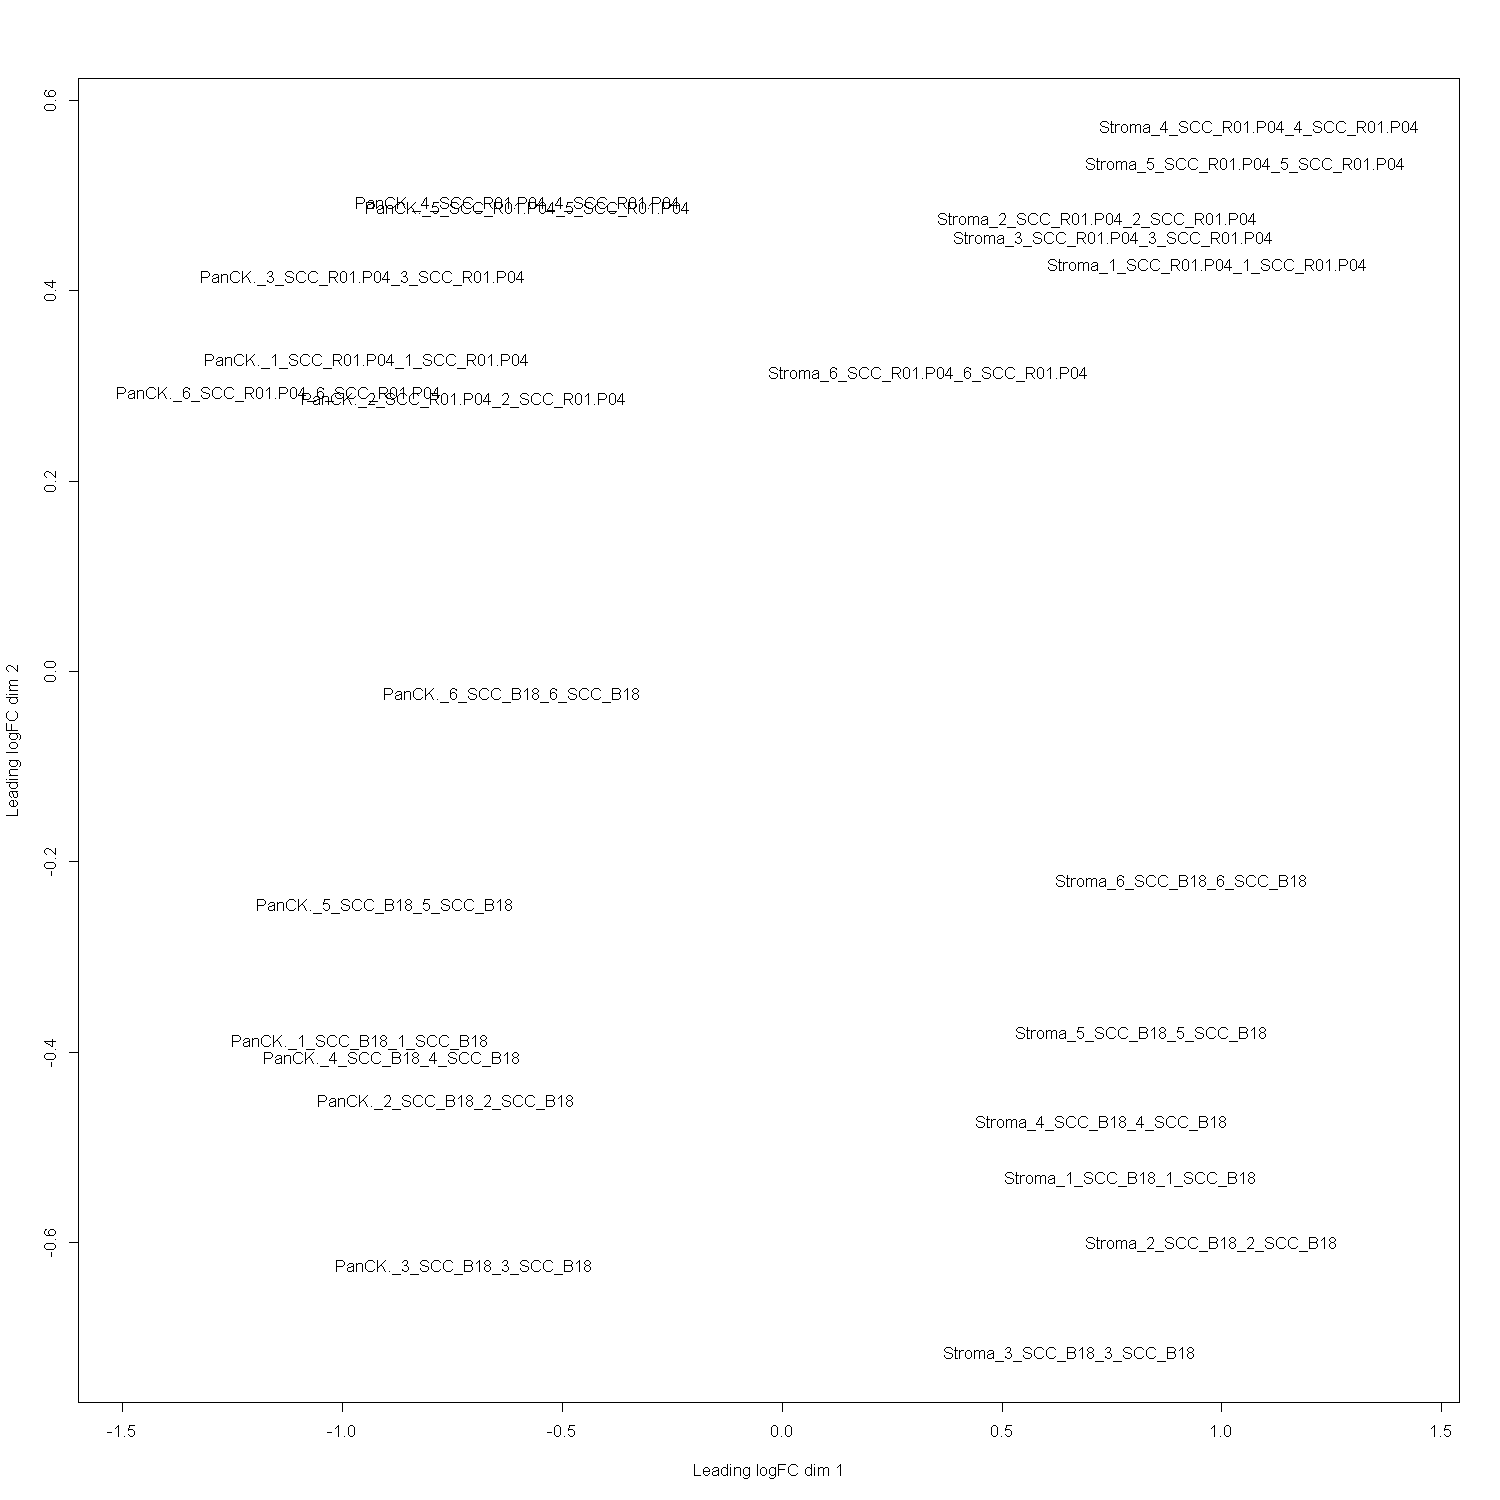

In [51]:
plotMDS(Protein_QC_SC_DGE)

In [53]:
glMDSPlot(Protein_QC_SC_DGE, groups = Protein_QC_SC_DGE$samples$group )

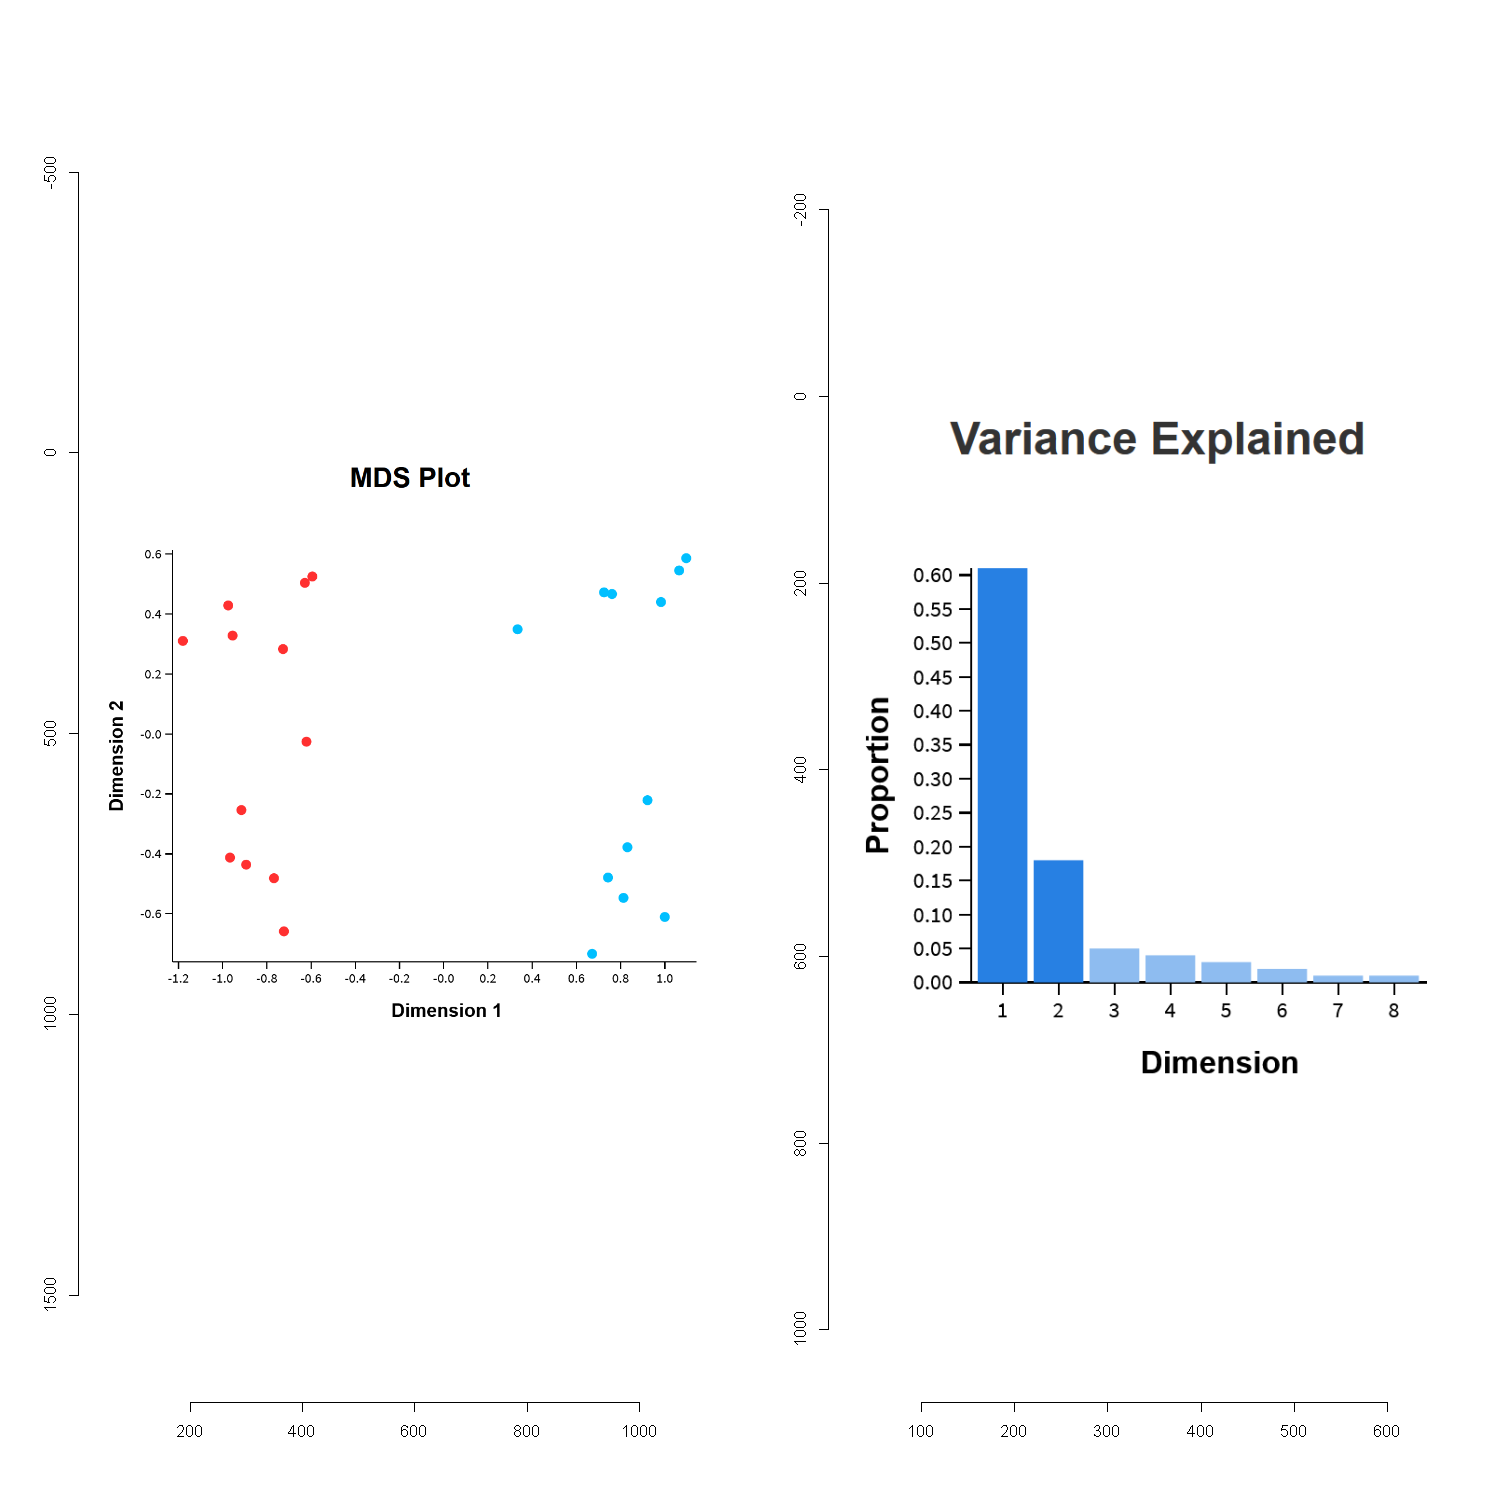

In [54]:
par(mfrow=c(1,2))
plot(load.image("Analysis_Onkar/Protein/MDS.png"))
plot(load.image("Analysis_Onkar/Protein/Var_MDS.png"))

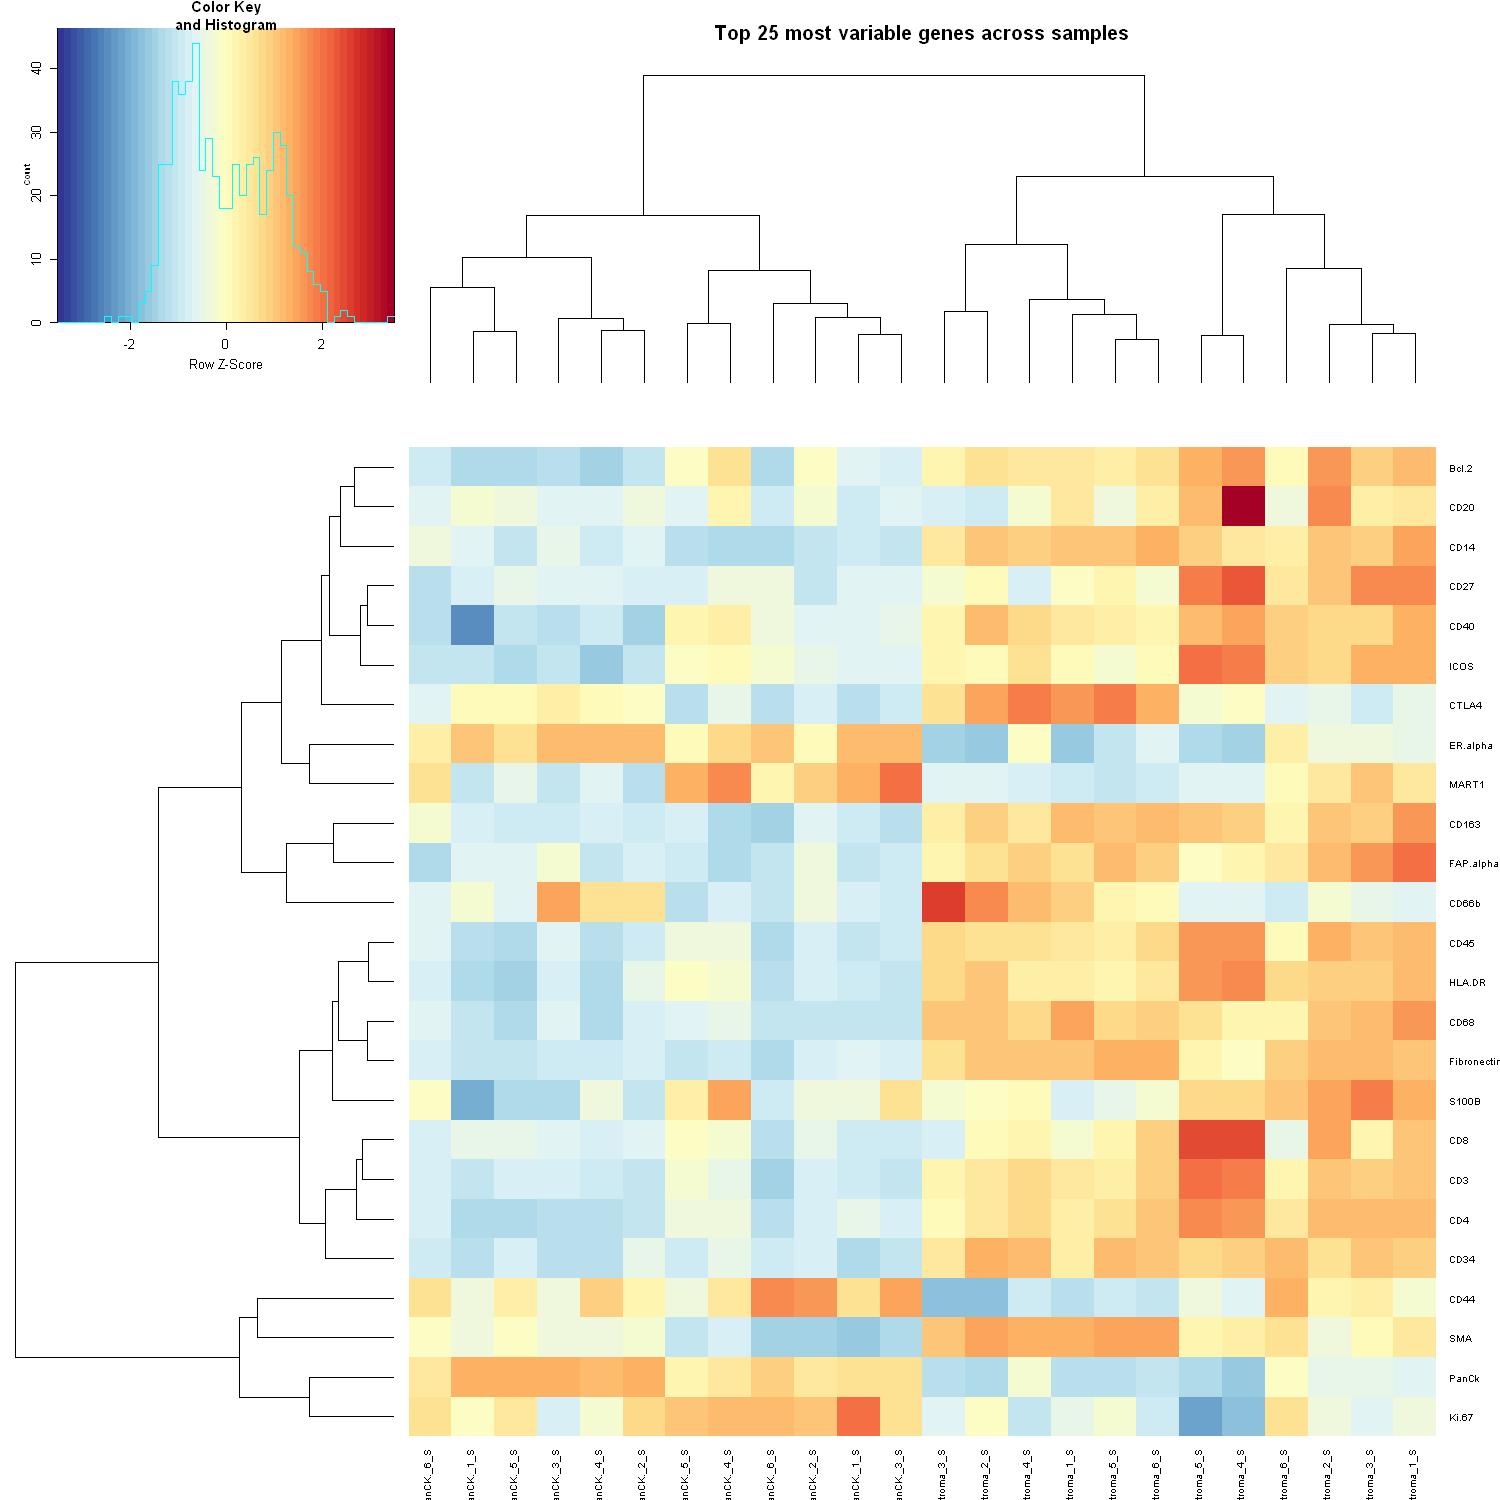

In [57]:
logcounts_prot <- cpm.DGEList(Protein_QC_SC_DGE,log=TRUE)
var_genes_prot <- apply(logcounts_prot, 1, var)
select_var <- names(sort(var_genes_prot, decreasing=TRUE))[1:25]
highly_variable_lcpm <- logcounts_prot[select_var,]
mypalette <- brewer.pal(11,"RdYlBu")
morecols <- colorRampPalette(mypalette)
col.cell <- c("purple","orange")[Protein_QC_SC_DGE$samples$group]
# Plot the heatmap
highly_variable_lcpm_heatmap <- data.frame(highly_variable_lcpm)
colnames(highly_variable_lcpm_heatmap) <- substring(colnames(highly_variable_lcpm),1,10)
heatmap.2(as.matrix(highly_variable_lcpm_heatmap),col=rev(morecols(50)),trace="none", main="Top 25 most variable genes across samples",ColSideColors=col.cell,scale="row")

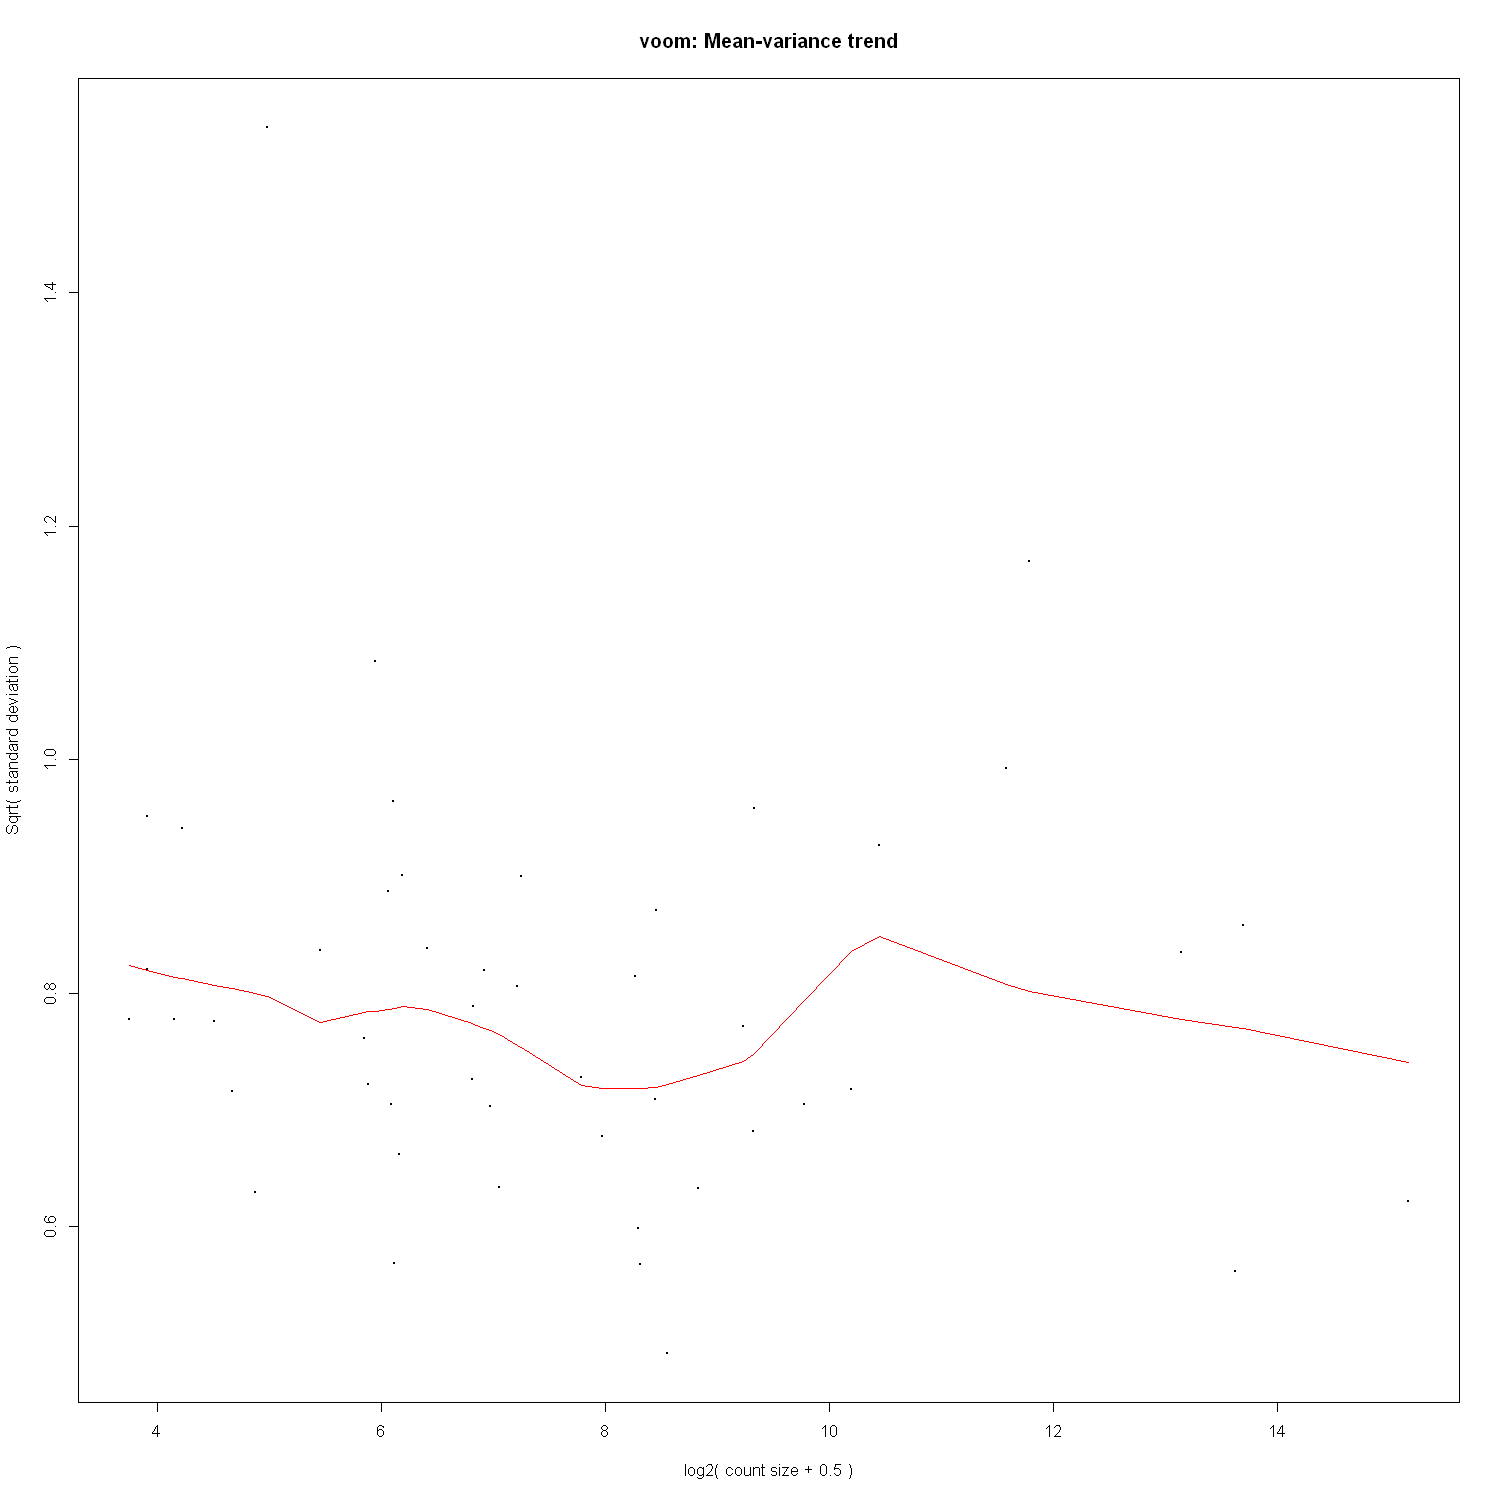

In [72]:
Protein_QC_SC_DGE <- calcNormFactors(Protein_QC_SC_DGE)
design <- model.matrix(~ 0 + Protein_QC_SC_DGE$samples$group)
colnames(design) <- substring(colnames(design),32)
par(mfrow=c(1,1))
v <- voom(Protein_QC_SC_DGE,design,plot = TRUE)

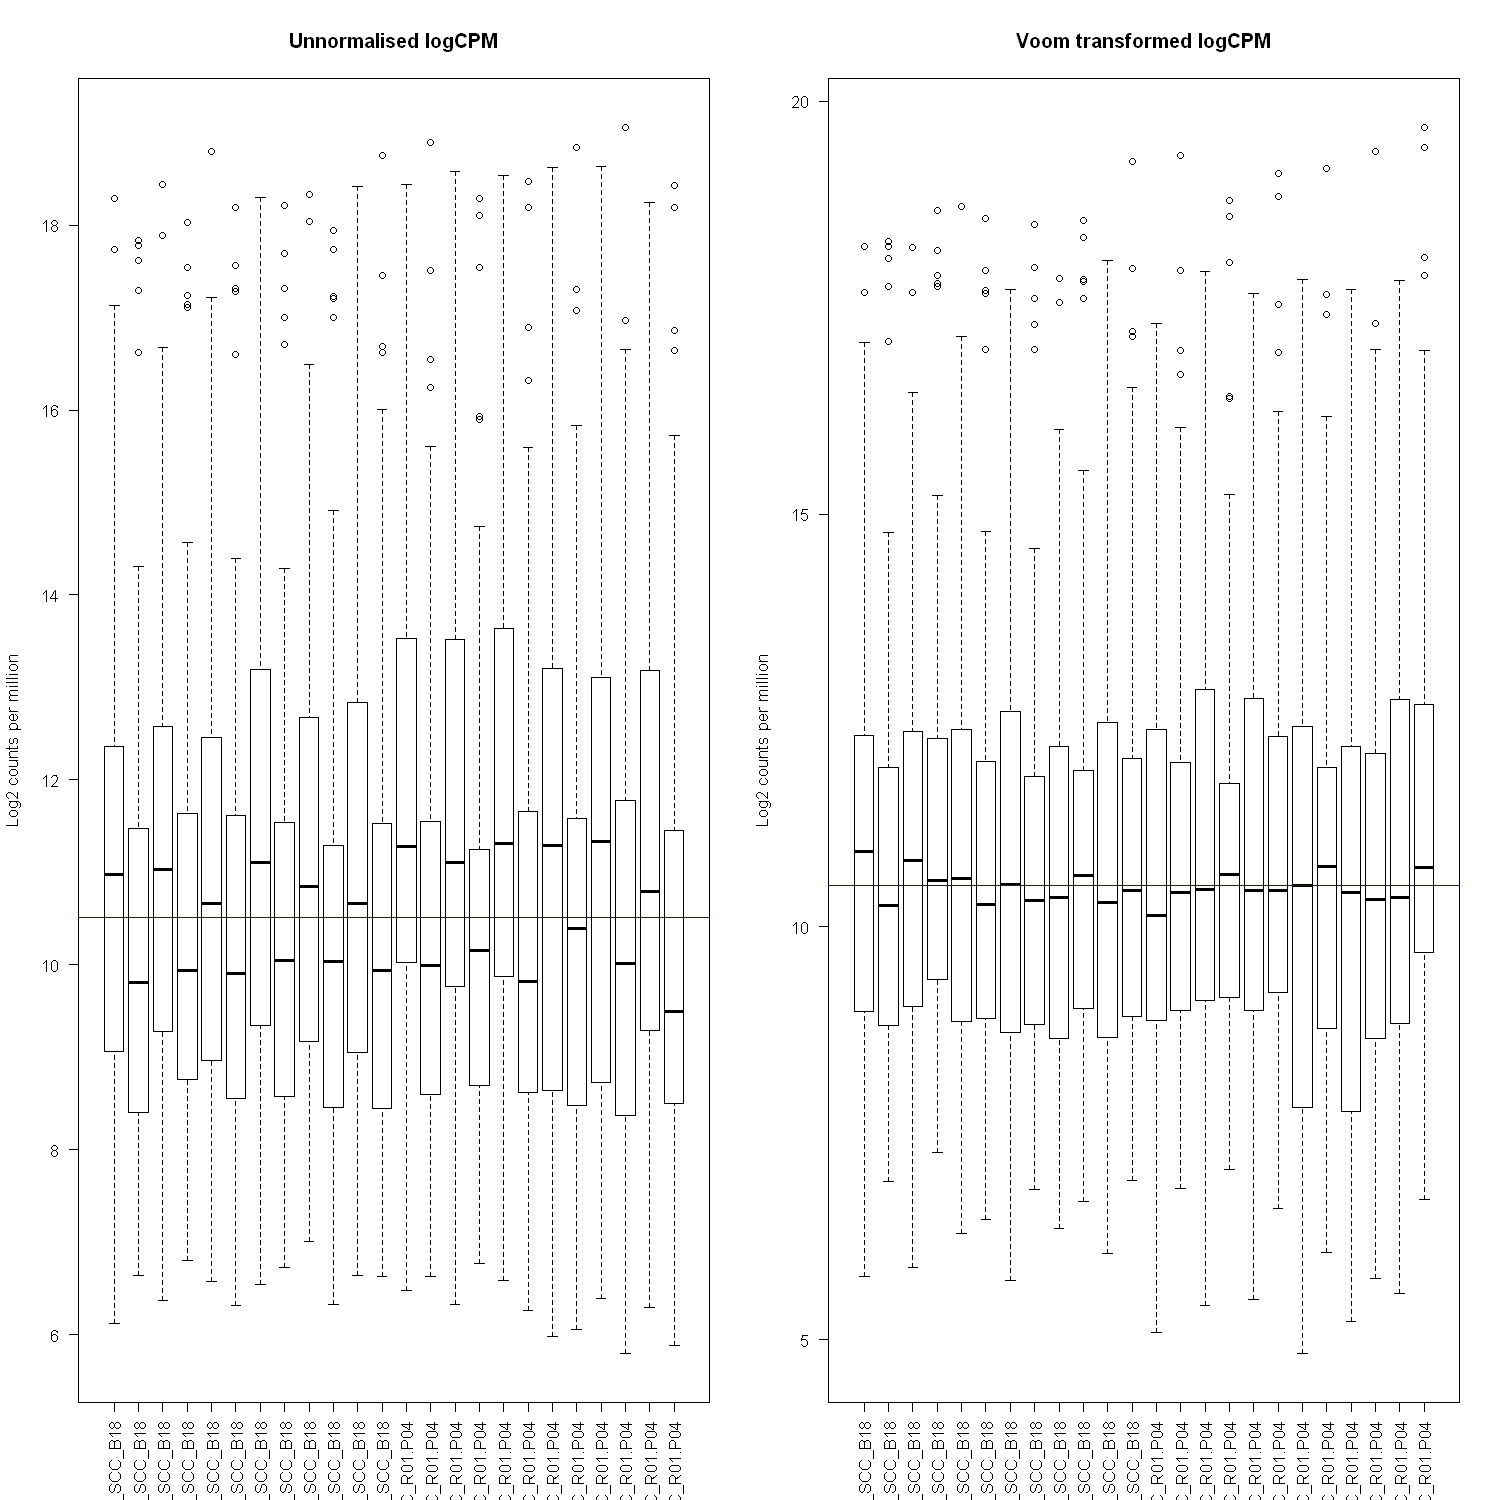

In [73]:
par(mfrow=c(1,2))
boxplot(logcounts_prot, xlab="", ylab="Log2 counts per million",las=2,main="Unnormalised logCPM")
abline(h=median(logcounts_prot),col="blue")
boxplot(v$E, xlab="", ylab="Log2 counts per million",las=2,main="Voom transformed logCPM")
abline(h=median(v$E),col="blue")

       StromvsPanck
Down             21
NotSig           14
Up               13

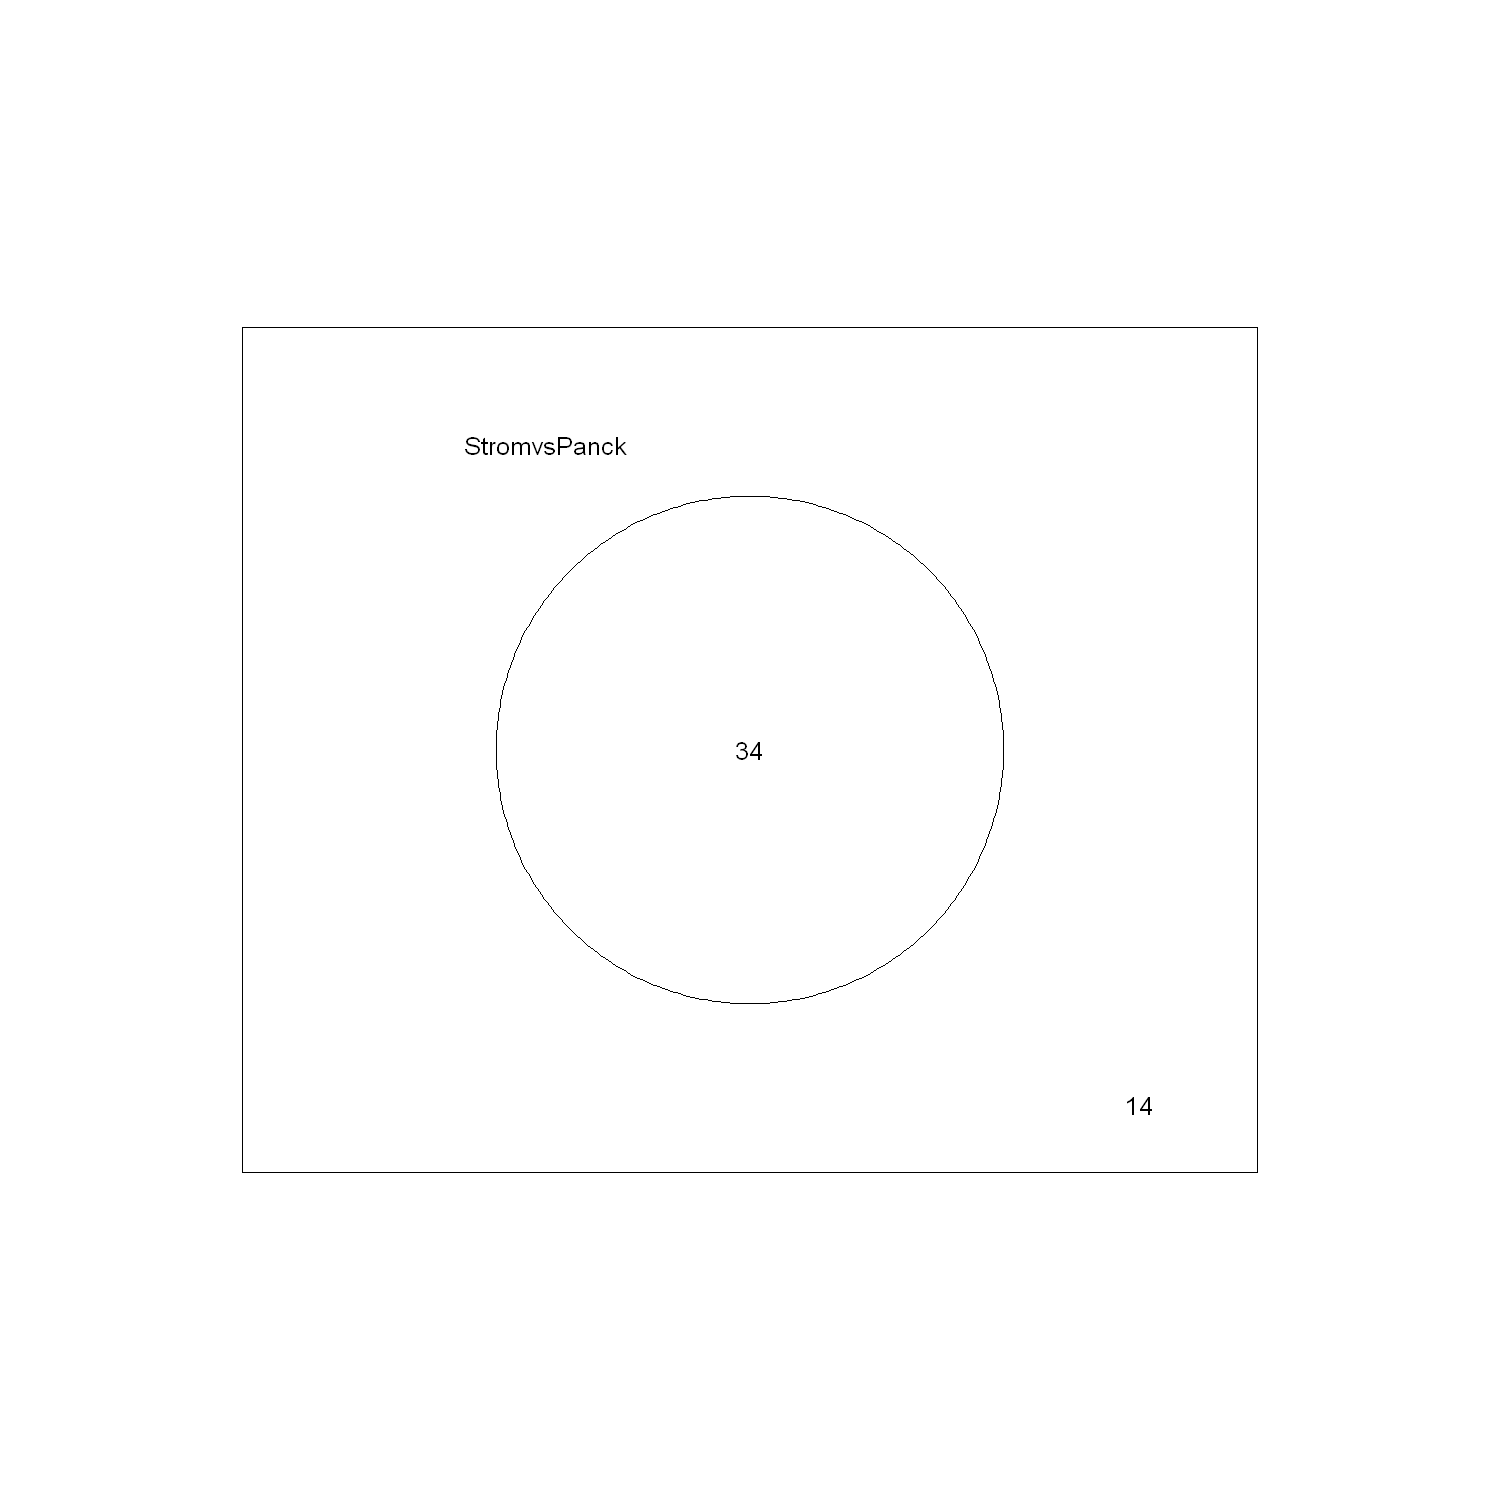

In [75]:
fit <- lmFit(v)
cont.matrix <- makeContrasts(StromvsPanck=Stroma - PanCK.,levels=design)
fit.cont <- contrasts.fit(fit, cont.matrix)
fit.cont <- eBayes(fit.cont)
summa.fit <- decideTests(fit.cont)
summary(summa.fit)
vennDiagram(summa.fit)

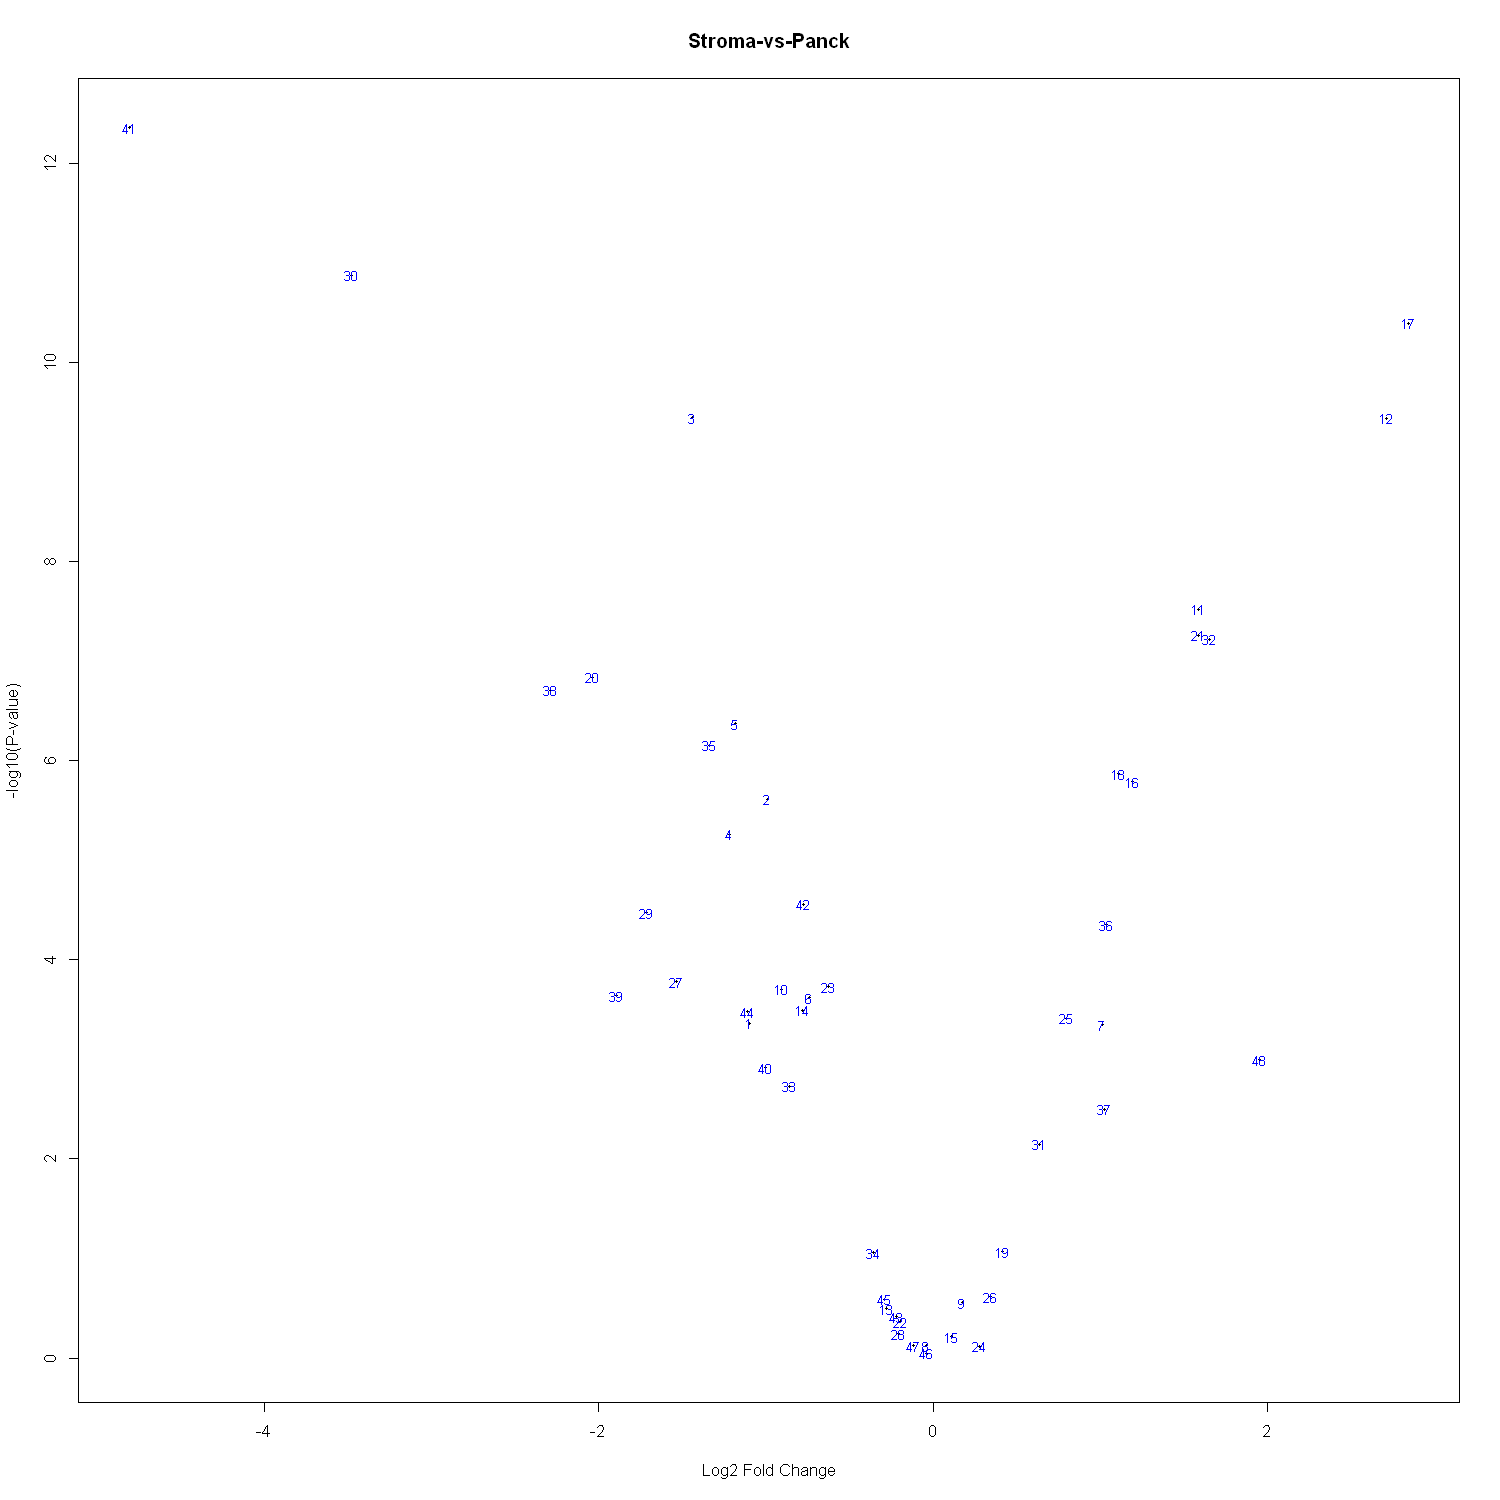

In [76]:
# Volcano Plot
par(mfrow=c(1,1))
#plotMD(fit.cont,coef=1,status=summa.fit[,"Stroma-vs-Panck"], values = c(-1, 1), hl.col=c("blue","red"))
volcanoplot(fit.cont,coef=1,highlight=100,names=fit.cont$genes$SYMBOL, main="Stroma-vs-Panck")

In [77]:
group2 <- Protein_QC_SC_DGE$samples$group
levels(group2) <- c("Stroma", "PanCK+")
glXYPlot(x=fit.cont$coefficients[,1], y=fit.cont$lods[,1],
         xlab="logFC", ylab="B", main="Stroma vs Panck",
         counts=v$E, groups=group2, status=summa.fit[,1],
         anno=fit.cont$genes, side.main="Gene", folder="volcano")

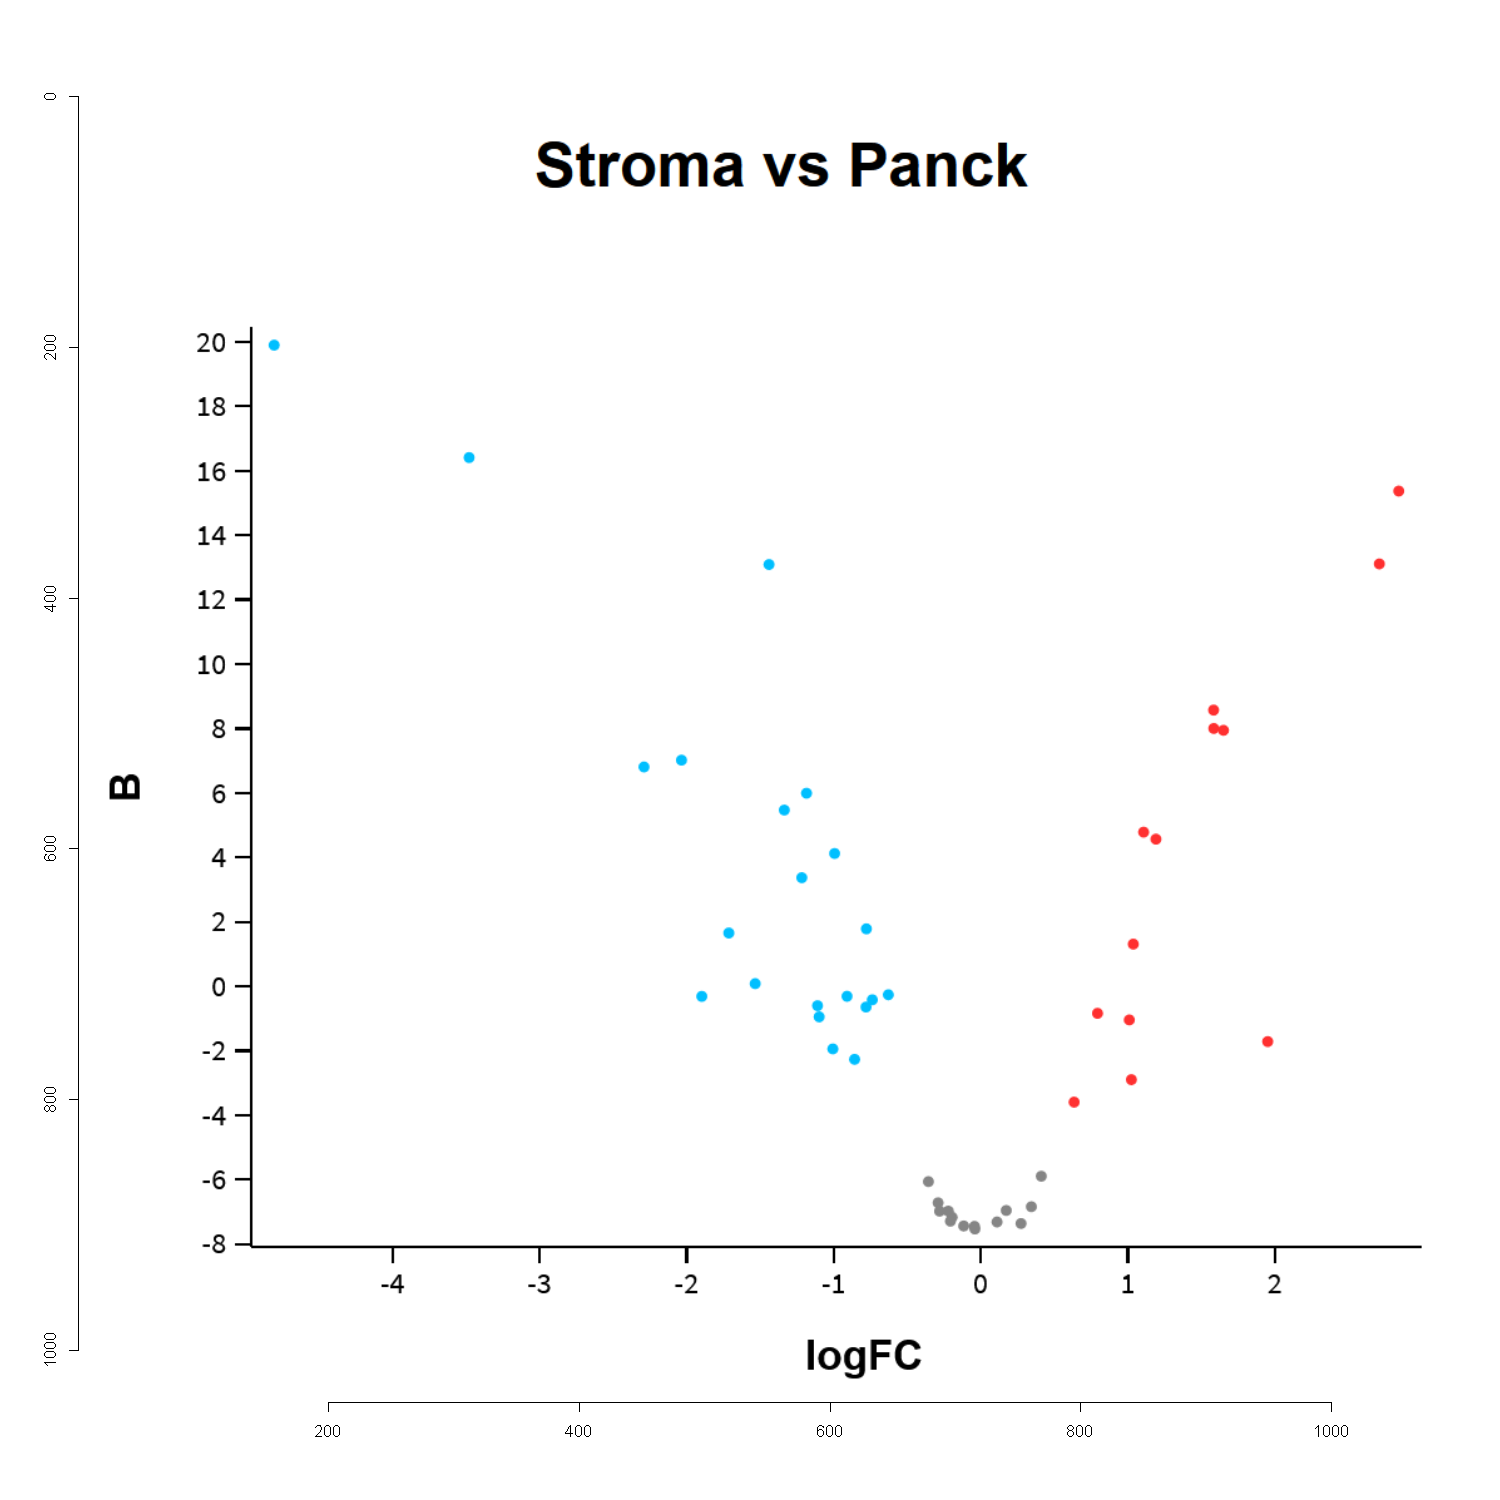

In [78]:
par(mfrow=c(1,1))
plot(load.image("Analysis_Onkar/Protein/Volcano.png"))

# Seurat

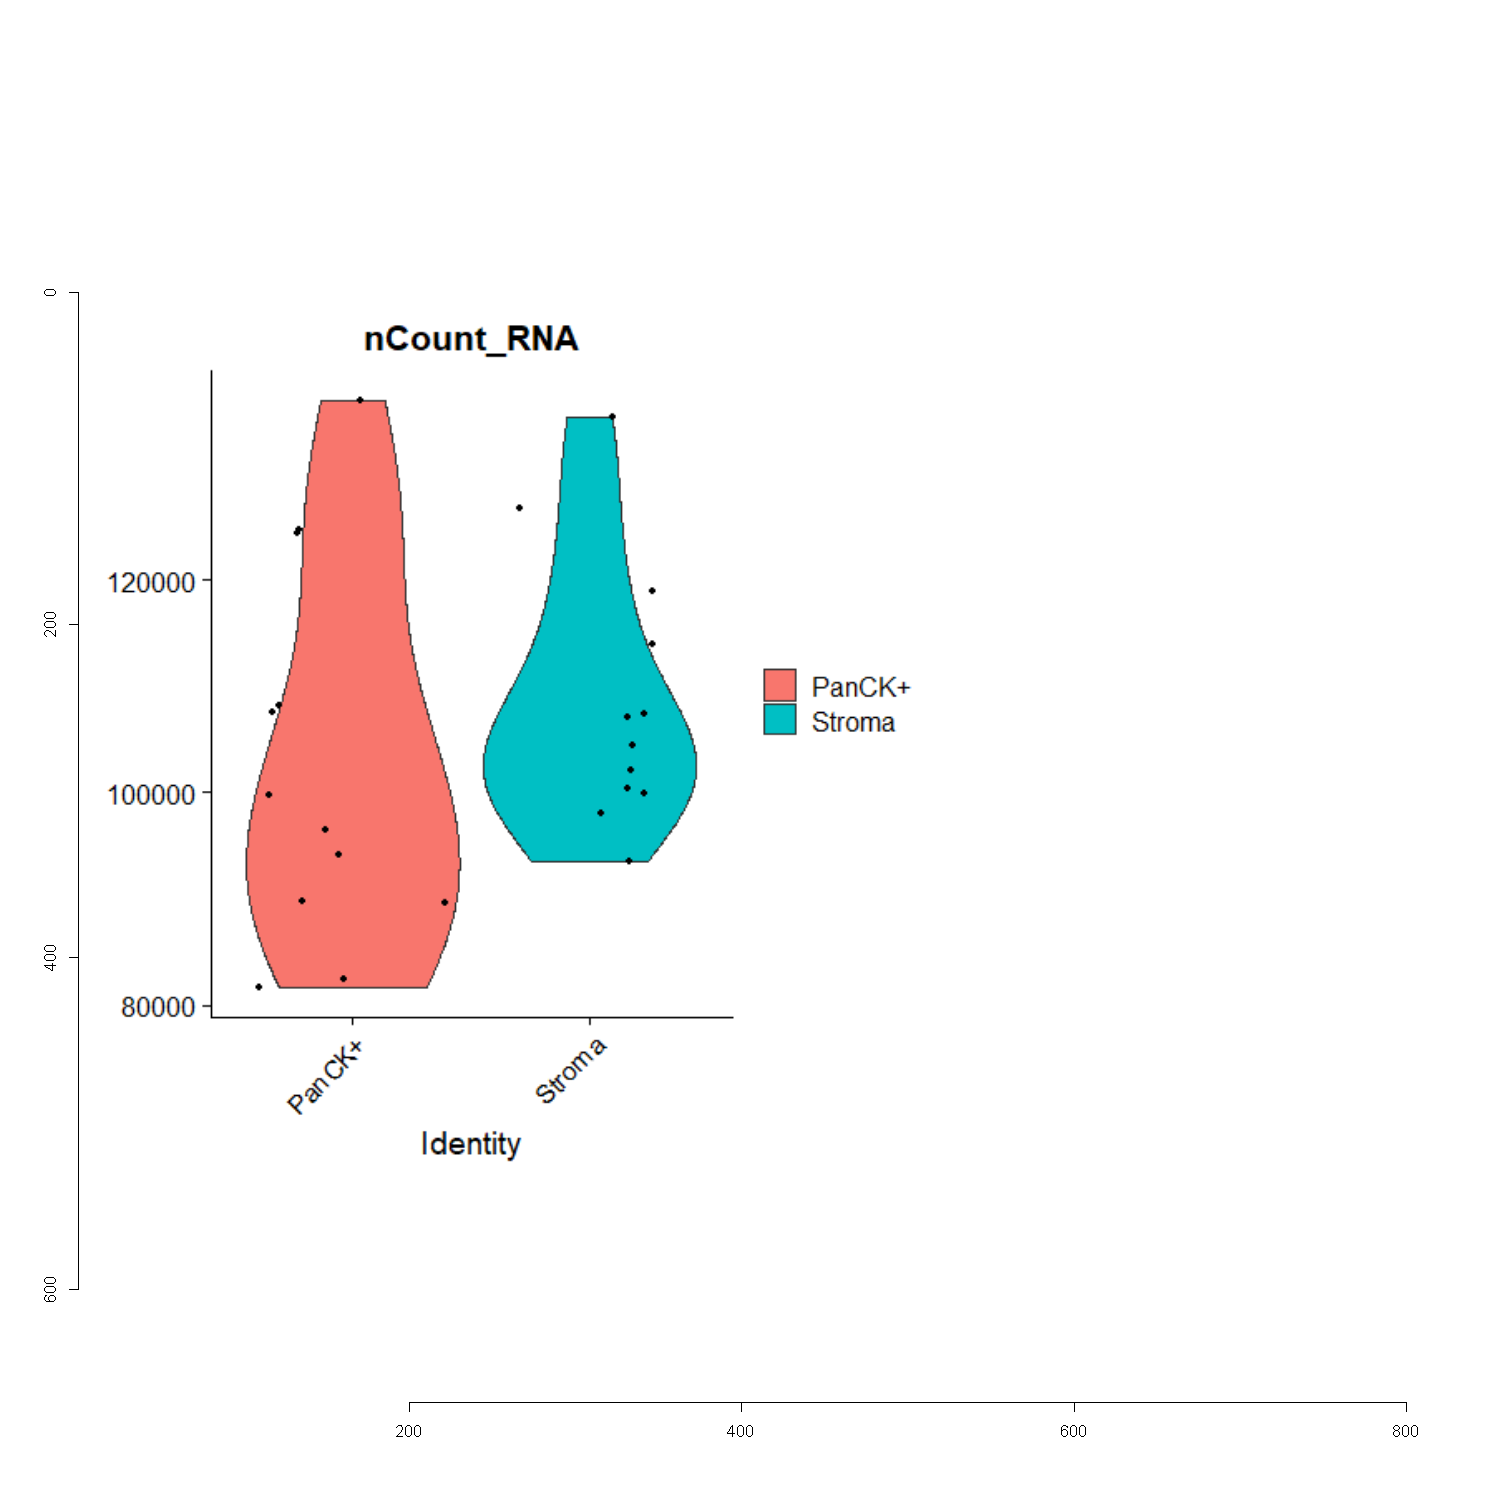

In [82]:
plot(load.image("Analysis_Onkar/Protein/ncount_RNA.png"))

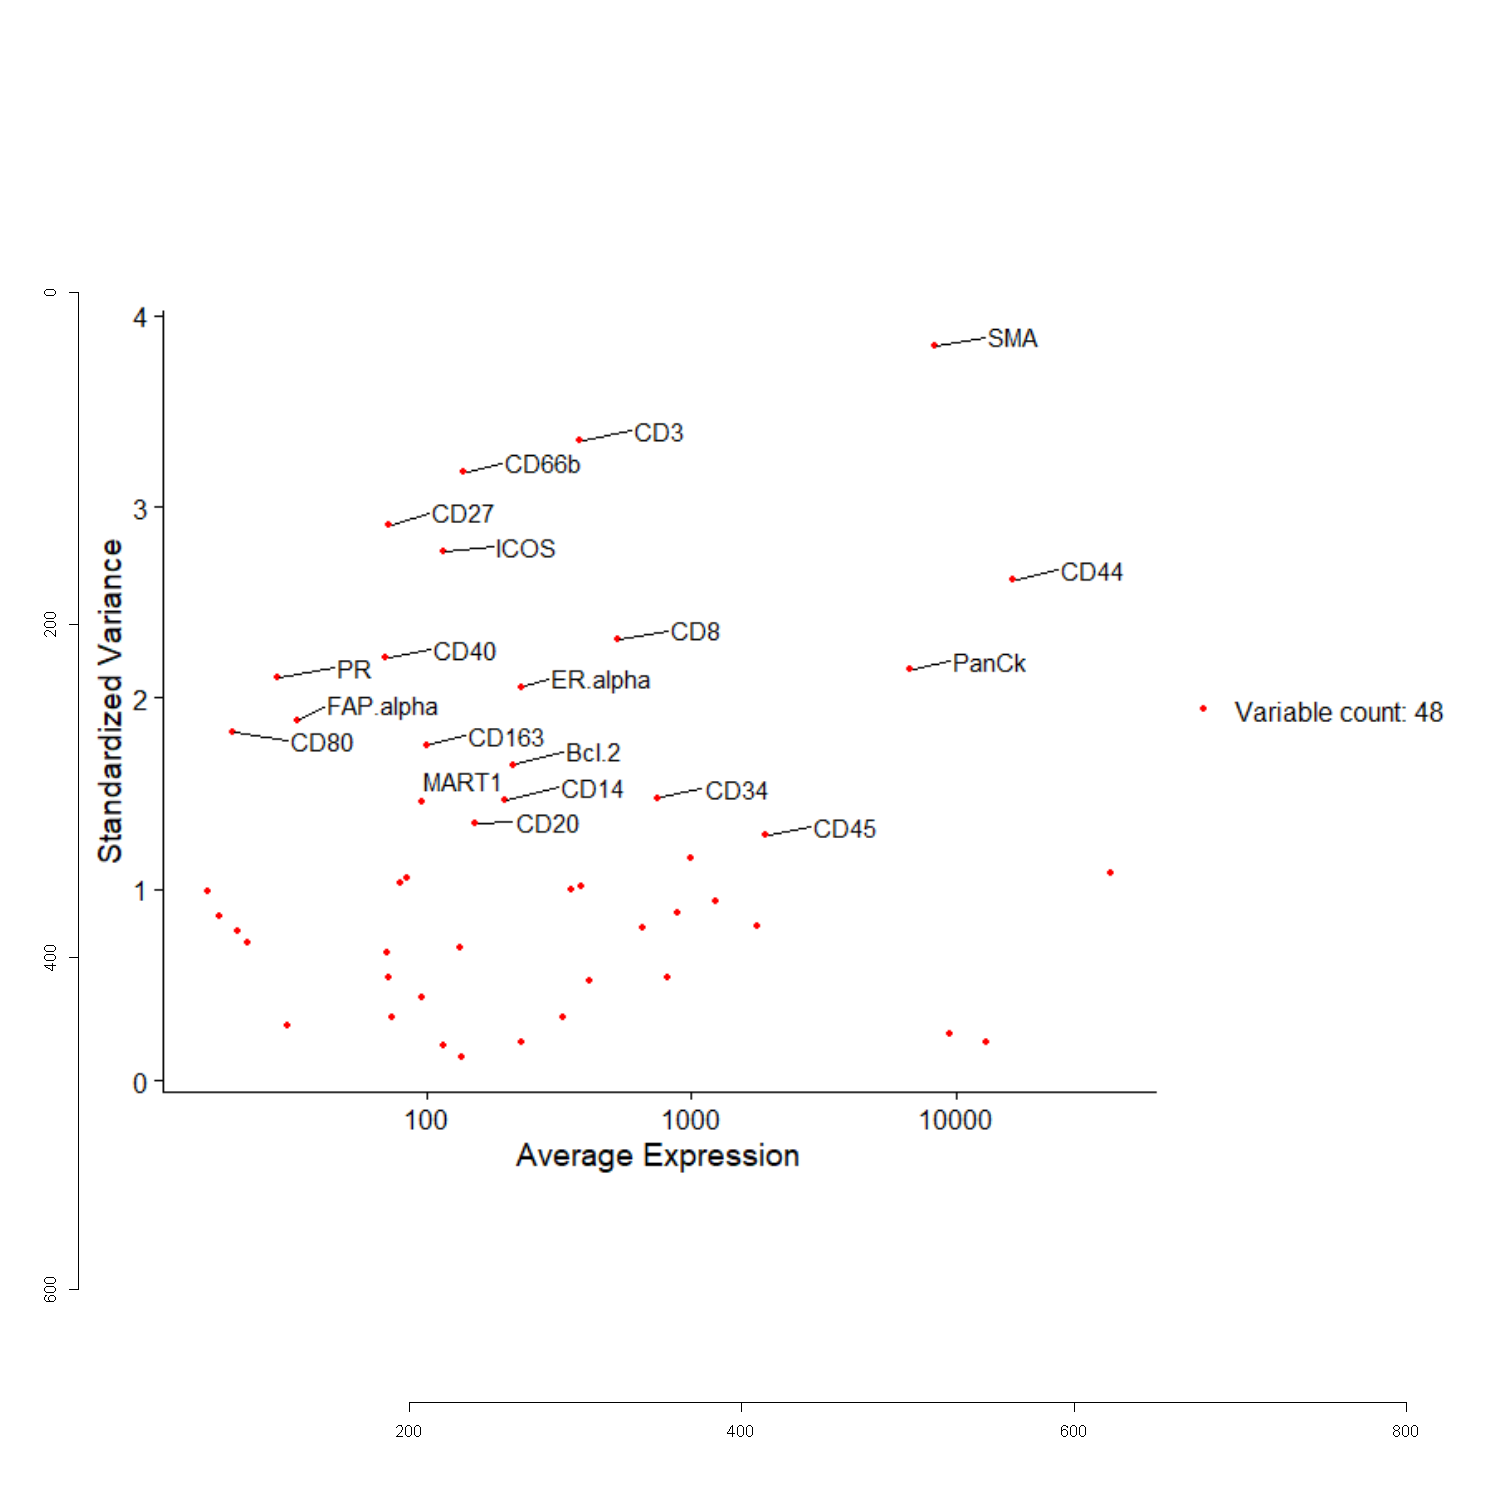

In [83]:
plot(load.image("Analysis_Onkar/Protein/Variable_Count.png"))

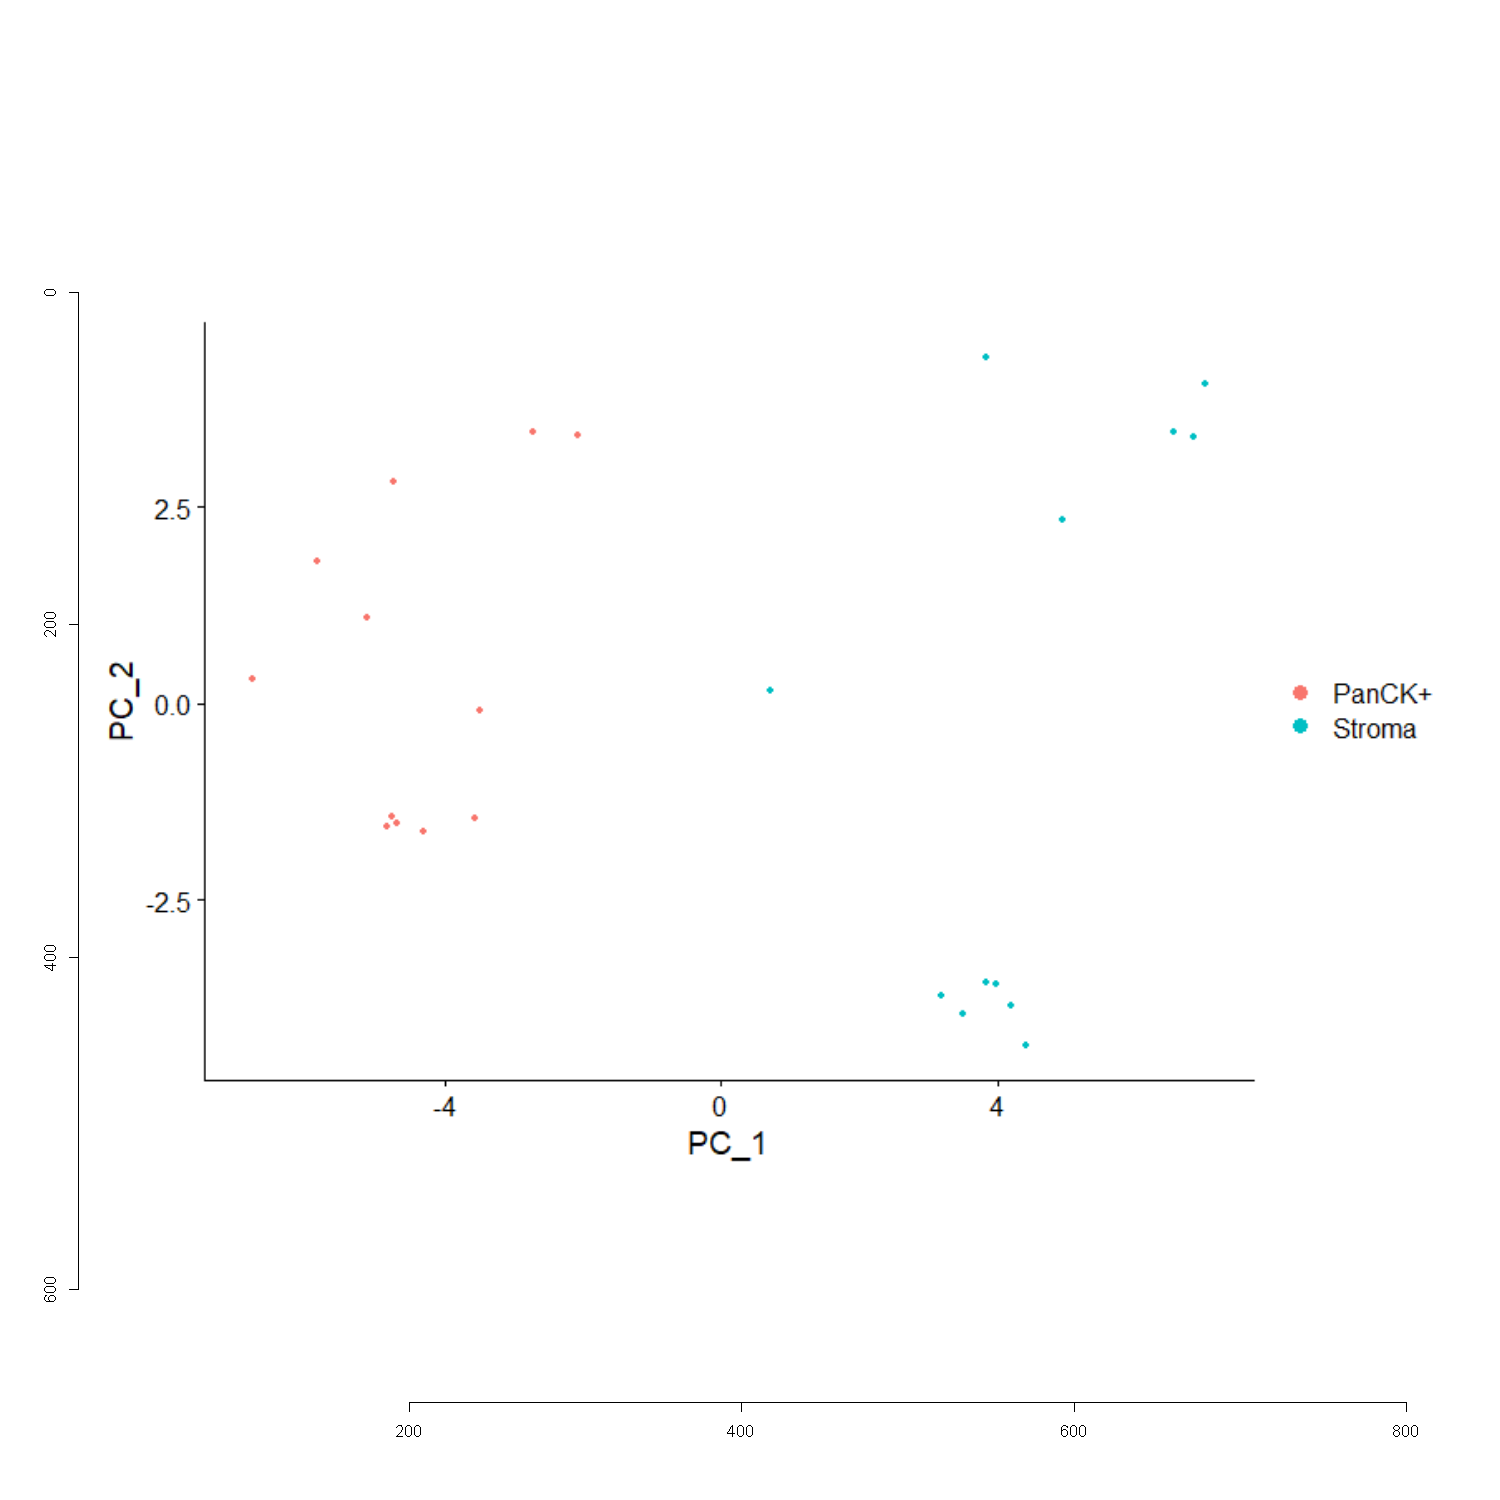

In [81]:
plot(load.image("Analysis_Onkar/Protein/PCA.png"))

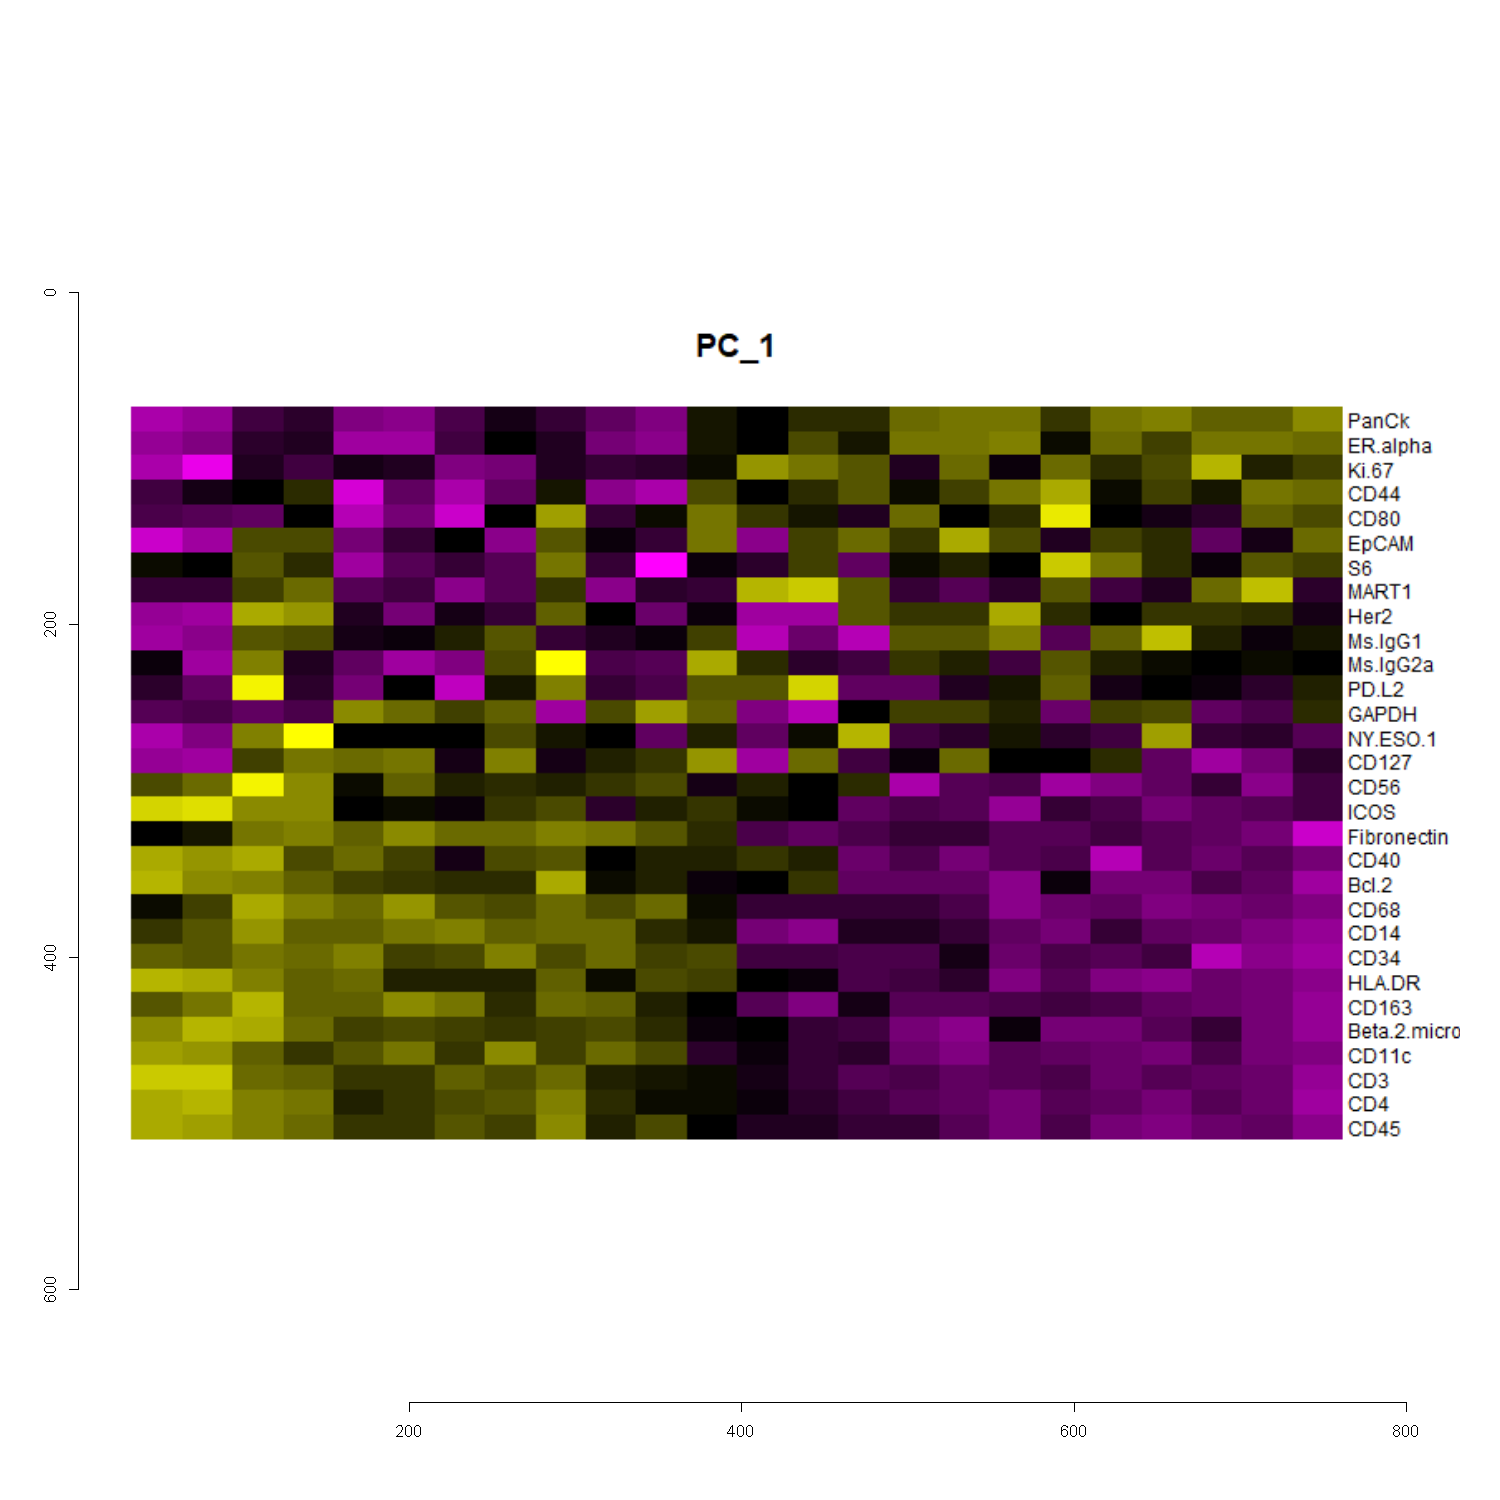

In [80]:
plot(load.image("Analysis_Onkar/Protein/Dim_Heatmap.png"))

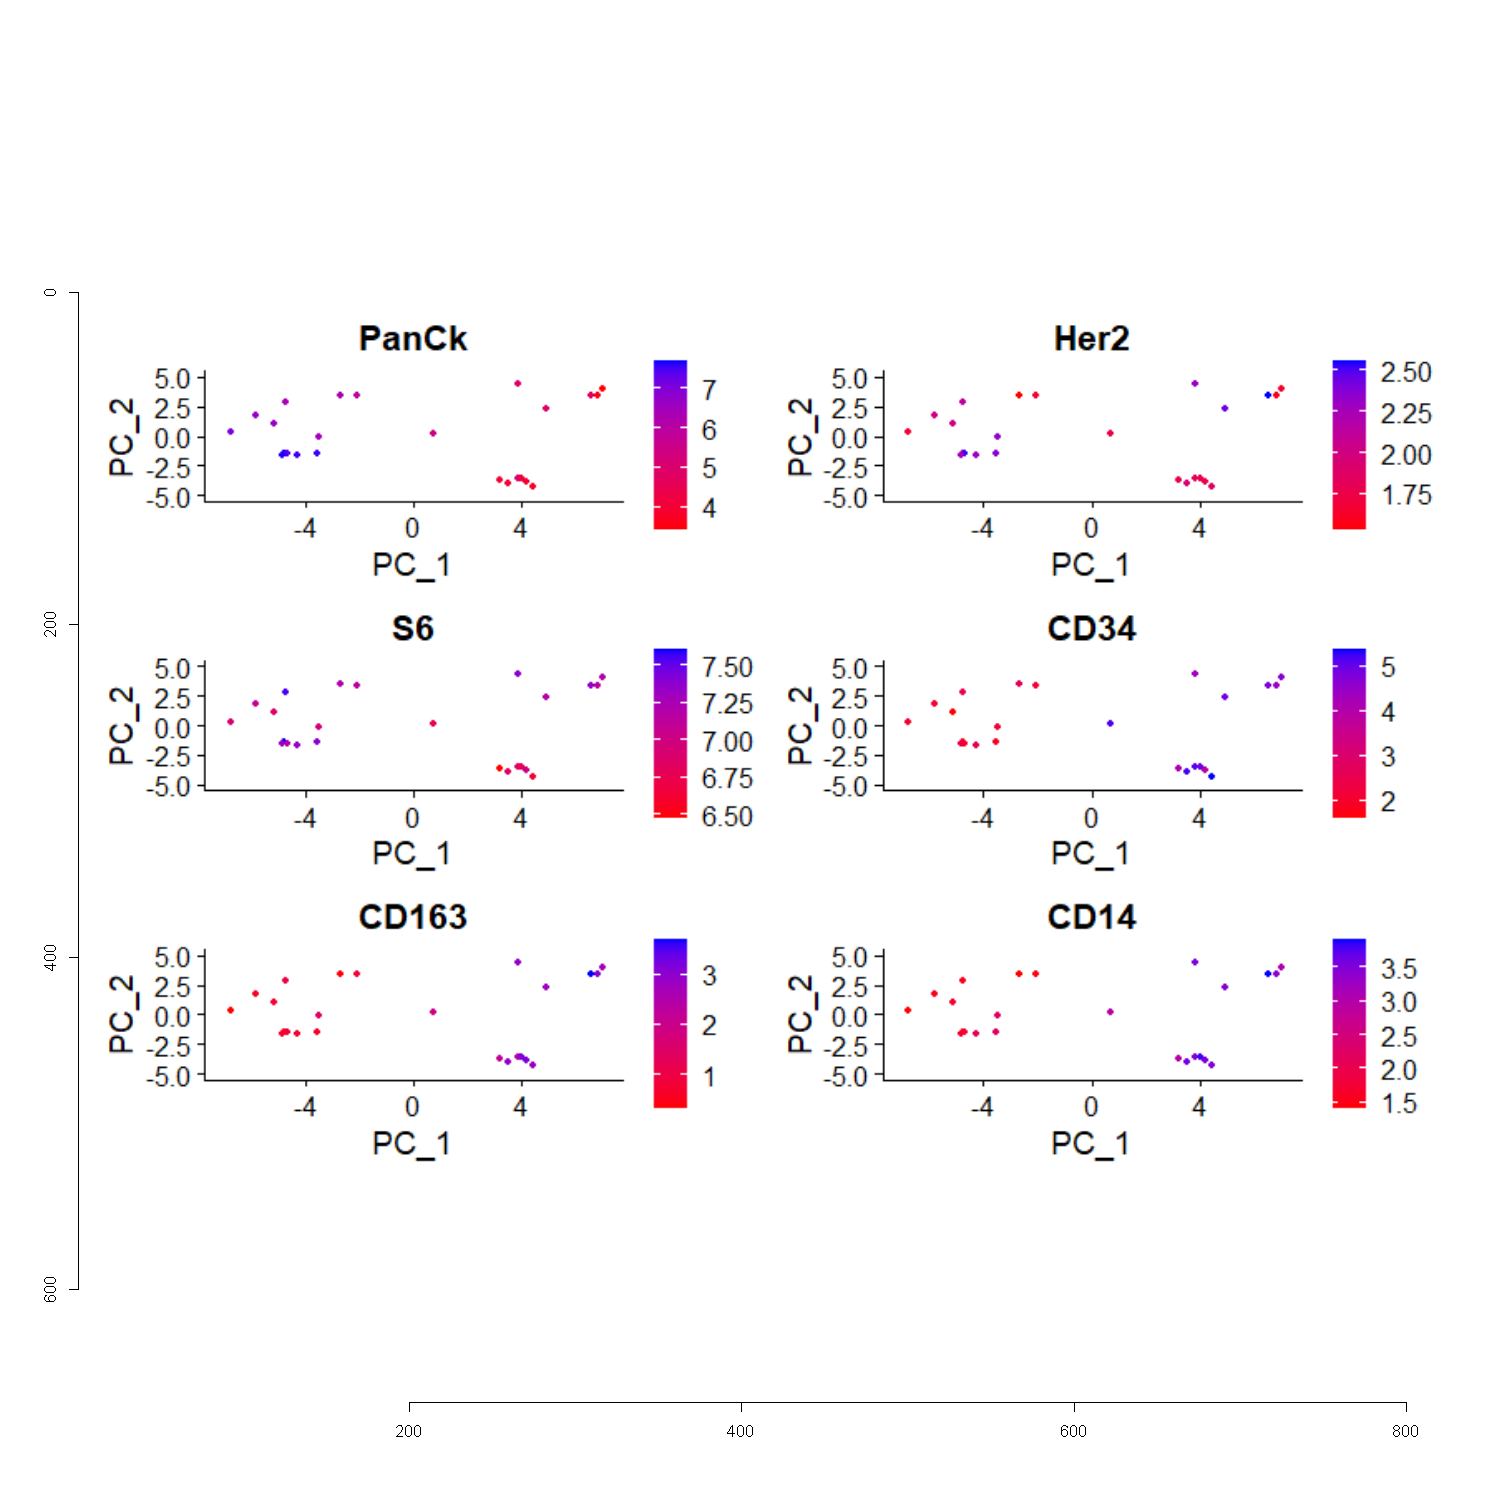

In [79]:
plot(load.image("Analysis_Onkar/Protein/F_Plot.png"))